# 📑 Introduction

> This case study explores how real-world business problems in financial services are addressed using Exploratory Data Analysis (EDA) and Machine Learning. The goal is to understand risk analytics in the context of lending and how data can help reduce financial losses.

# 📝 Business Understanding

> You work for a financial institution that provides loans to urban customers. When evaluating loan applications, the institution faces two types of risk:

> - Rejecting a reliable applicant leads to a loss of potential business.
> - Approving a risky applicant may result in financial loss if the borrower defaults.

> The dataset contains historical loan application data, including the repayment status. The aim is to identify patterns that predict loan default, enabling smarter decisions like loan denial, reduced loan amounts, or higher interest rates for riskier profiles.

# 🎯 Business Objectives
> - Defaulted loans represent the largest source of credit loss for lenders.
> - The objective is to identify high-risk applicants before approval using EDA and machine learning.
> - Understanding the key variables that indicate default risk helps improve lending decisions and manage the overall risk portfolio.

# 🗃️ Data Description

----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# 🌍 Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import toad
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import hvplot.pandas
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
import holoviews as hv

pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('lending_club_loan_two.csv', low_memory=False)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
statistics = toad.detector.detect(df)
statistics['missing'].values

array(['0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '5.79%',
       '4.62%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%',
       '0.44%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.07%',
       '0.00%', '0.00%', '0.00%', '9.54%', '0.14%', '0.00%'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### `address`
We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [5]:
df.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [6]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [7]:
df.drop('address', axis=1, inplace=True)

# 🔍 Exploratory Data Analysis

**OVERALL GOAL:** 
- Get an understanding for which variables are important, view summary statistics, and visualize the data

## Define Good and Bad Loans - Identify the Target Variable

In [8]:
df['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

- Bad Loans Status
  - Charged Off 
- Good Loans Status 
  - Fully Paid

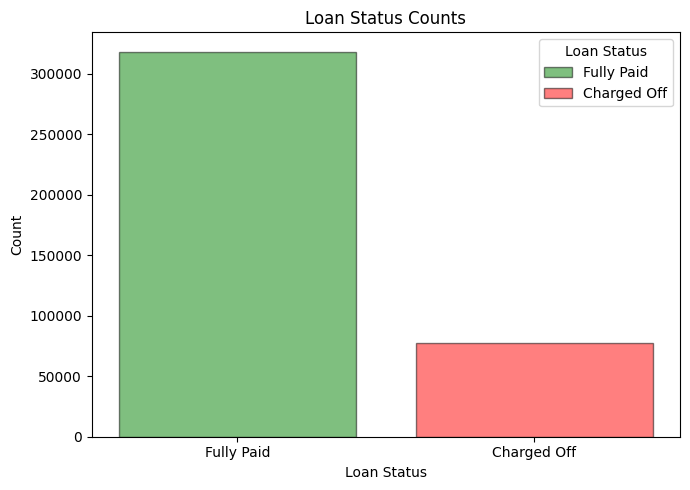

In [9]:
counts = df['loan_status'].value_counts()
statuses = ['Fully Paid', 'Charged Off']
color_map = {'Fully Paid': 'green', 'Charged Off': 'red'}

plt.figure(figsize=(7, 5))

x = range(len(statuses))
for i, status in enumerate(statuses):
    plt.bar(
        x[i], counts[status],
        color=color_map[status],
        alpha=0.5,
        edgecolor='black',
        label=status
    )

plt.xticks(x, statuses)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

## Performance and Sample Windows

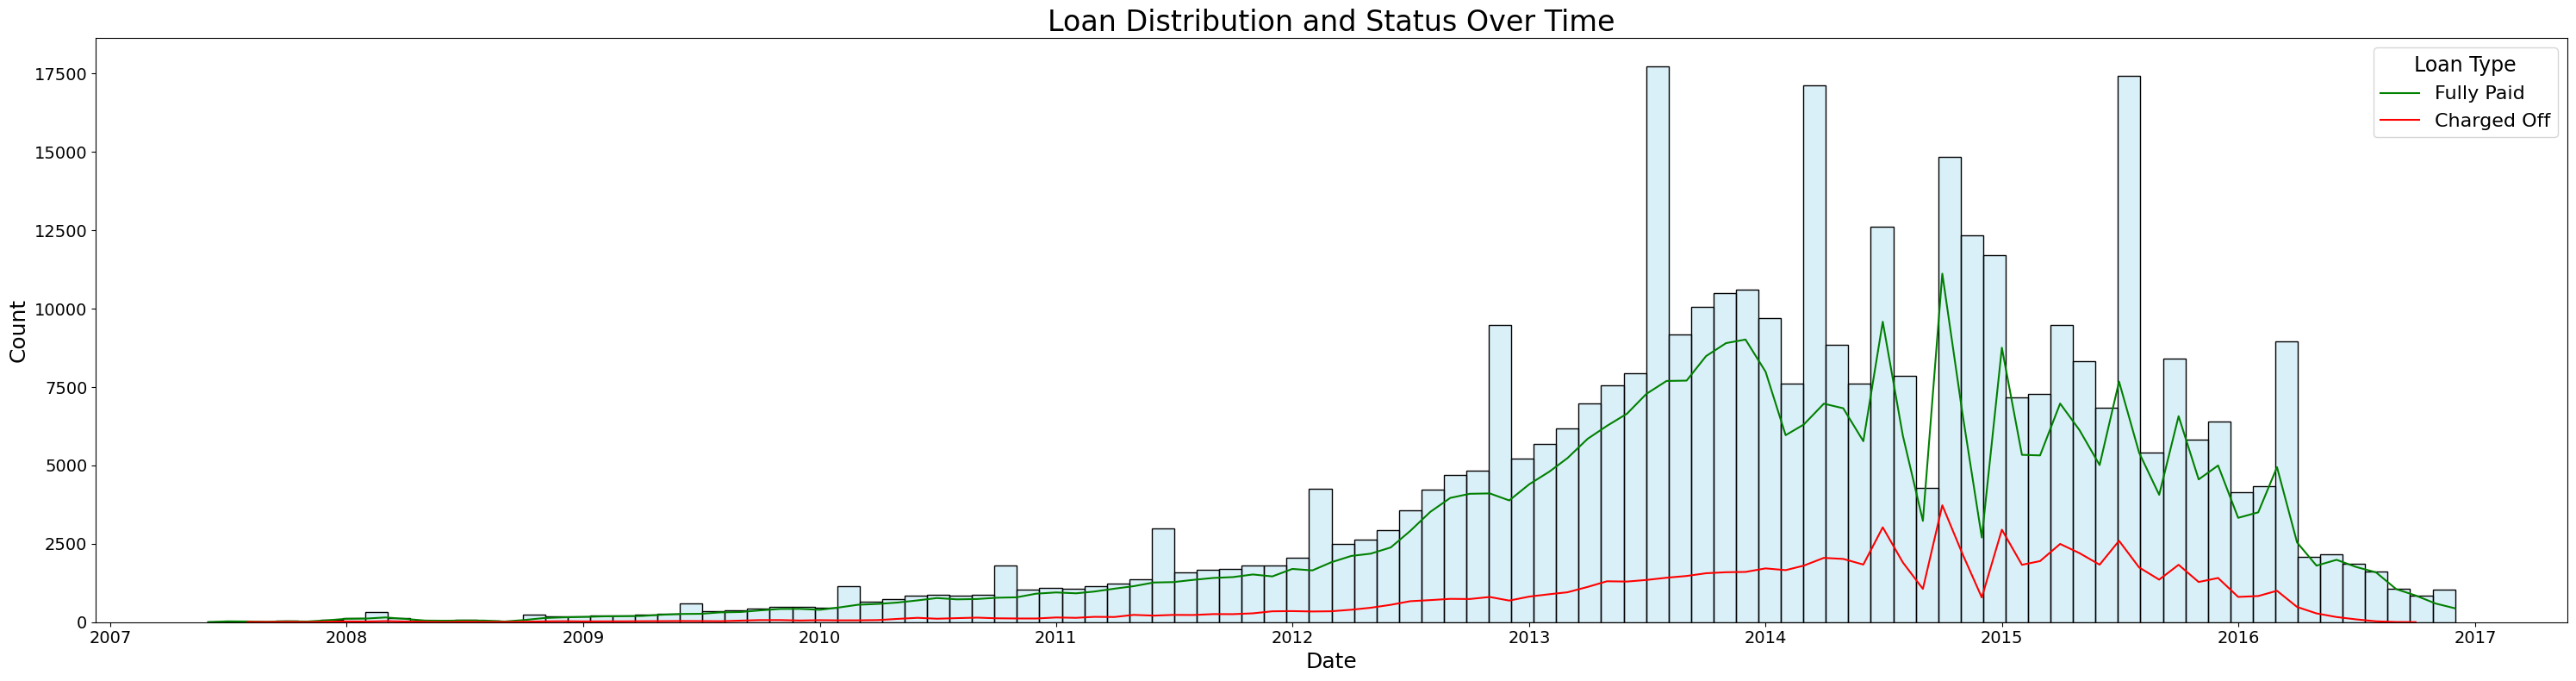

In [10]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df = df.sort_values('issue_d')

good_loans = df[df['loan_status'] == 'Fully Paid'].groupby('issue_d').size().reset_index(name='Count')
bad_loans = df[df['loan_status'] == 'Charged Off'].groupby('issue_d').size().reset_index(name='Count')

plt.figure(figsize=(30, 8))

sns.histplot(data=df, x='issue_d', bins=100, color='skyblue', edgecolor='black', alpha=0.3)

sns.lineplot(data=good_loans, x='issue_d', y='Count', color='green', label='Fully Paid')
sns.lineplot(data=bad_loans, x='issue_d', y='Count', color='red', label='Charged Off')

plt.title('Loan Distribution and Status Over Time', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Loan Type', title_fontsize=17, fontsize=16)

plt.tight_layout()
plt.show()


In [11]:
first_date = df['issue_d'].min()
last_date = df['issue_d'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

First date: 2007-06-01 00:00:00
Last date: 2016-12-01 00:00:00


# 📊 Data Visualization

## ✔️ `loan_amnt` & `installment`

> - `installment`: The monthly payment owed by the borrower if the loan originates.
> - `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

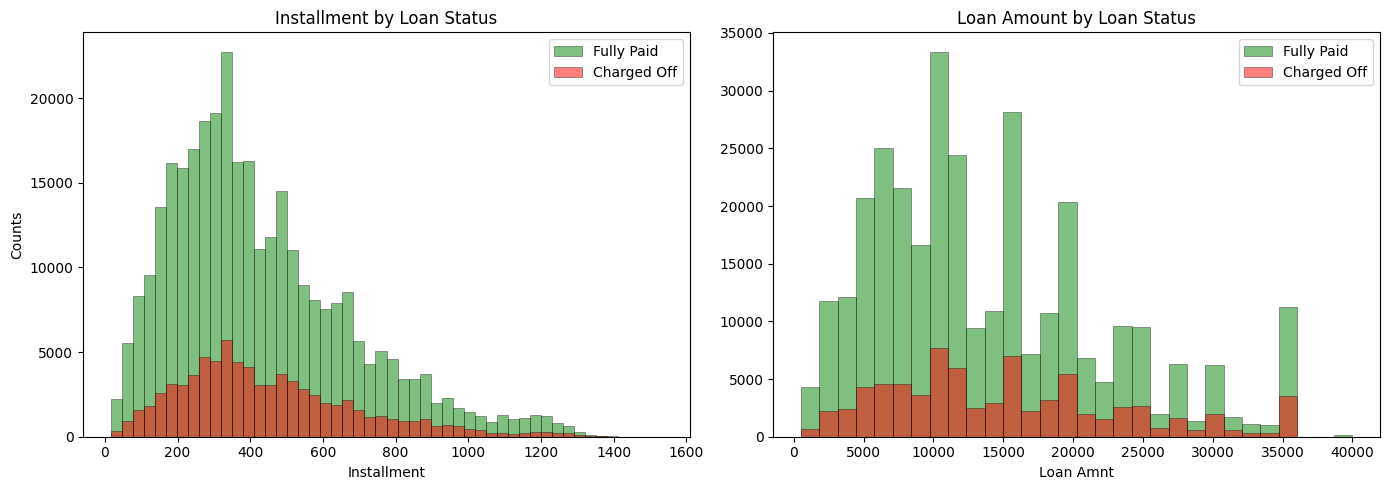

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_info = [
    ('installment', 50, 'Installment by Loan Status'),
    ('loan_amnt', 30, 'Loan Amount by Loan Status')
]

for ax, (col, n_bins, title) in zip(axes, plot_info):
    bins = np.histogram_bin_edges(df[col], bins=n_bins)
    for status in ['Fully Paid', 'Charged Off']:
        values = df[df['loan_status'] == status][col]
        ax.hist(values, bins=bins, alpha=0.5, label=status,
                color=color_map[status], edgecolor='black', linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.legend(loc='upper right')

axes[0].set_ylabel("Counts")

plt.tight_layout()
plt.show()

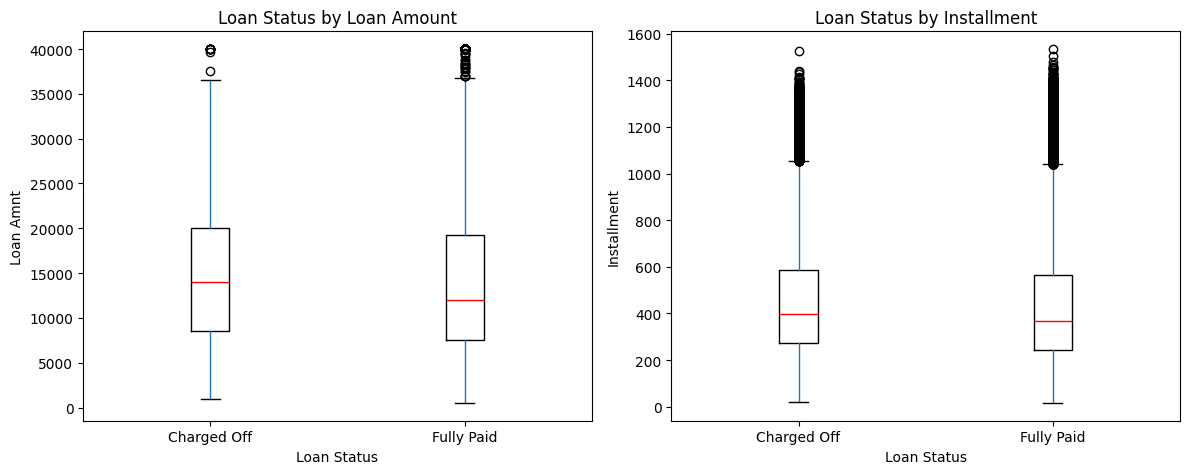

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cols = ['loan_amnt', 'installment']
titles = ['Loan Status by Loan Amount', 'Loan Status by Installment']

for ax, col, title in zip(axes, cols, titles):
    df.boxplot(column=col, by='loan_status', ax=ax, grid=False,
               boxprops=dict(color='black'),
               medianprops=dict(color='red'))
    ax.set_title(title)
    ax.set_xlabel("Loan Status")
    ax.set_ylabel(col.replace('_', ' ').title())

plt.suptitle("")
plt.tight_layout()
plt.show()

In [14]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## ✔️ `grade` & `sub_grade`

> - `grade`: LC assigned loan grade
> - `sub_grade`: LC assigned loan subgrade

Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 

What are the unique possible `grade` & `sub_grade`?

In [15]:
print(f"GRADE unique: {df.grade.unique()}")
print(f"SUB_GRADE unique: {df.sub_grade.unique()}")

GRADE unique: ['E' 'A' 'C' 'B' 'F' 'D' 'G']
SUB_GRADE unique: ['E2' 'A5' 'A3' 'A2' 'C4' 'B5' 'C1' 'A4' 'C2' 'B1' 'C5' 'B2' 'B3' 'F4'
 'C3' 'F2' 'D1' 'F1' 'B4' 'E1' 'D4' 'D3' 'D2' 'A1' 'D5' 'F3' 'E5' 'E3'
 'E4' 'G5' 'F5' 'G1' 'G3' 'G2' 'G4']


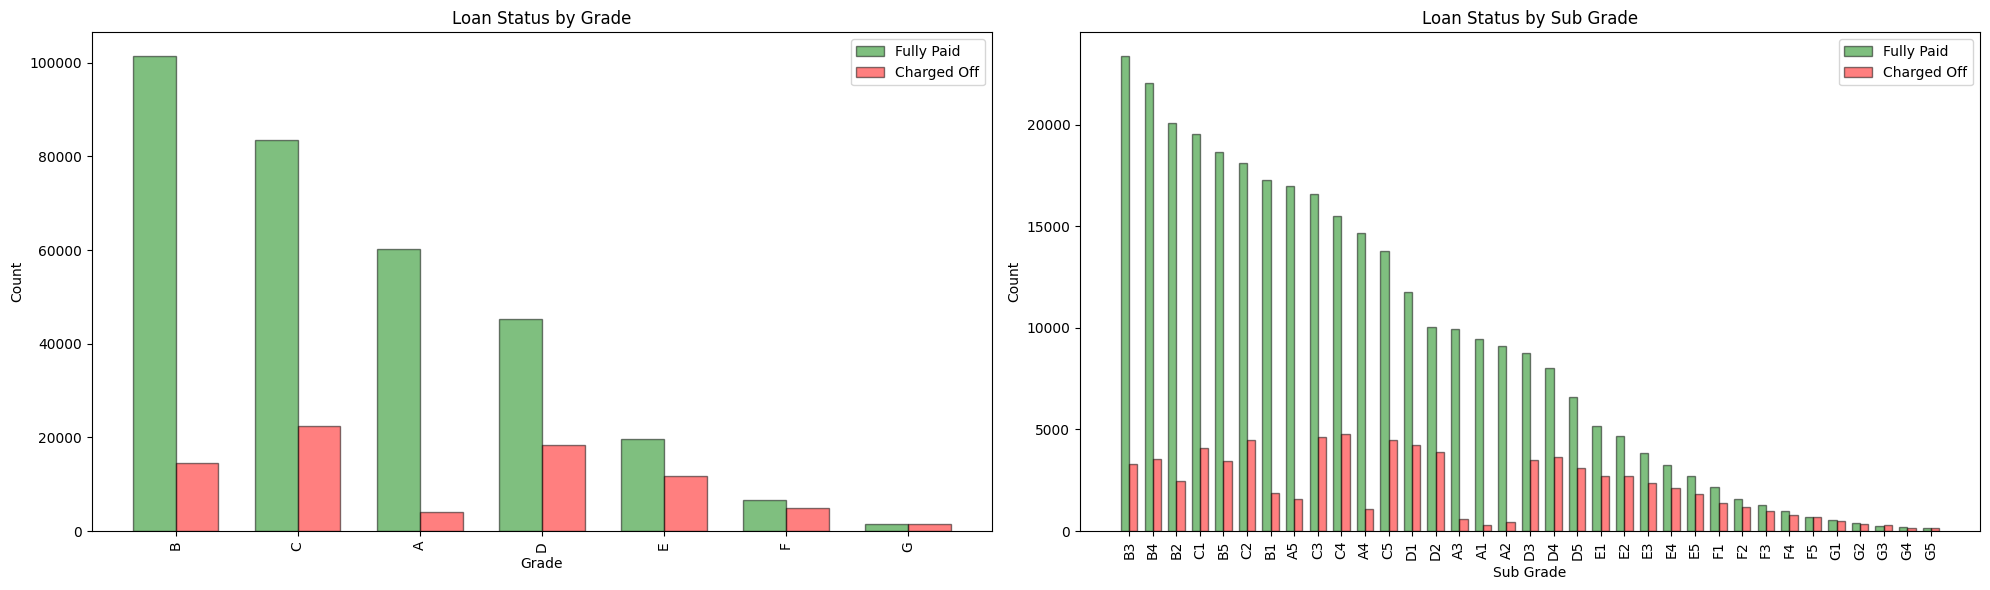

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_data = {
    'Grade': df.groupby(['grade', 'loan_status'], observed=True).size().unstack(fill_value=0),
    'Sub Grade': df.groupby(['sub_grade', 'loan_status'], observed=True).size().unstack(fill_value=0)
}

for ax, (title, data) in zip(axes, plot_data.items()):
    data = data.sort_values('Fully Paid', ascending=False)
    x = np.arange(len(data))
    ax.bar(x - 0.175, data['Fully Paid'], width=0.35, label='Fully Paid',
           color=color_map['Fully Paid'], edgecolor='black', alpha=0.5)
    ax.bar(x + 0.175, data['Charged Off'], width=0.35, label='Charged Off',
           color=color_map['Charged Off'], edgecolor='black', alpha=0.5)
    ax.set(title=f"Loan Status by {title}", xlabel=title, ylabel="Count",
           xticks=x, xticklabels=data.index)
    ax.tick_params(axis='x', rotation=90)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

It looks like `F` and `G` subgrades don't get paid back that often. Isolate those and recreate the countplot just for those subgrades.

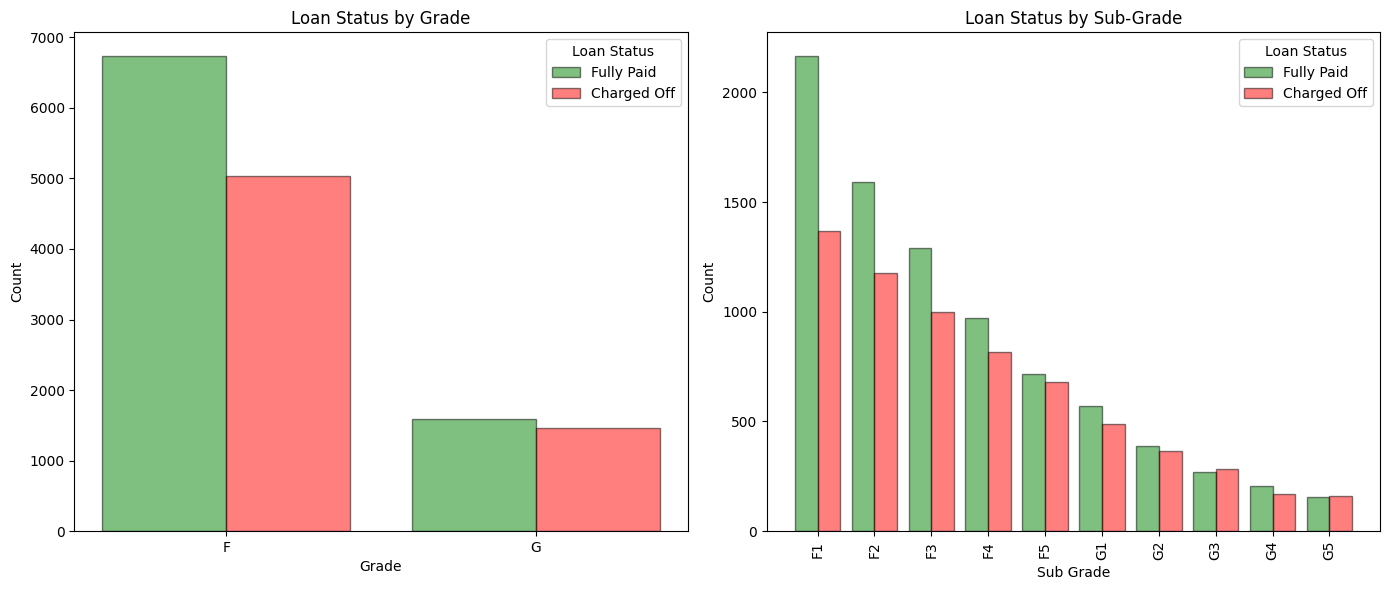

In [17]:
df1 = df[df['grade'].isin(['F', 'G'])]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_info = {
    'grade': 'Loan Status by Grade',
    'sub_grade': 'Loan Status by Sub-Grade'
}

bar_width = 0.4

for ax, (col, title) in zip(axes, plot_info.items()):
    order = sorted(df1[col].unique())
    counts = df1.groupby([col, 'loan_status'], observed=True).size().unstack(fill_value=0).reindex(order)

    x = np.arange(len(counts))
    for i, status in enumerate(['Fully Paid', 'Charged Off']):
        offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
        ax.bar(x + offset, counts[status], width=bar_width, color=color_map[status],
               label=status, alpha=0.5, edgecolor='black')

    ax.set(title=title, xlabel=col.replace('_', ' ').title(), ylabel='Count',
           xticks=x, xticklabels=order)
    ax.tick_params(axis='x', rotation=90 if col == 'sub_grade' else 0)
    ax.legend(title='Loan Status')

plt.tight_layout()
plt.show()


## ✔️ `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
> - `verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified
> - `purpose`: A category provided by the borrower for the loan request.

In [18]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

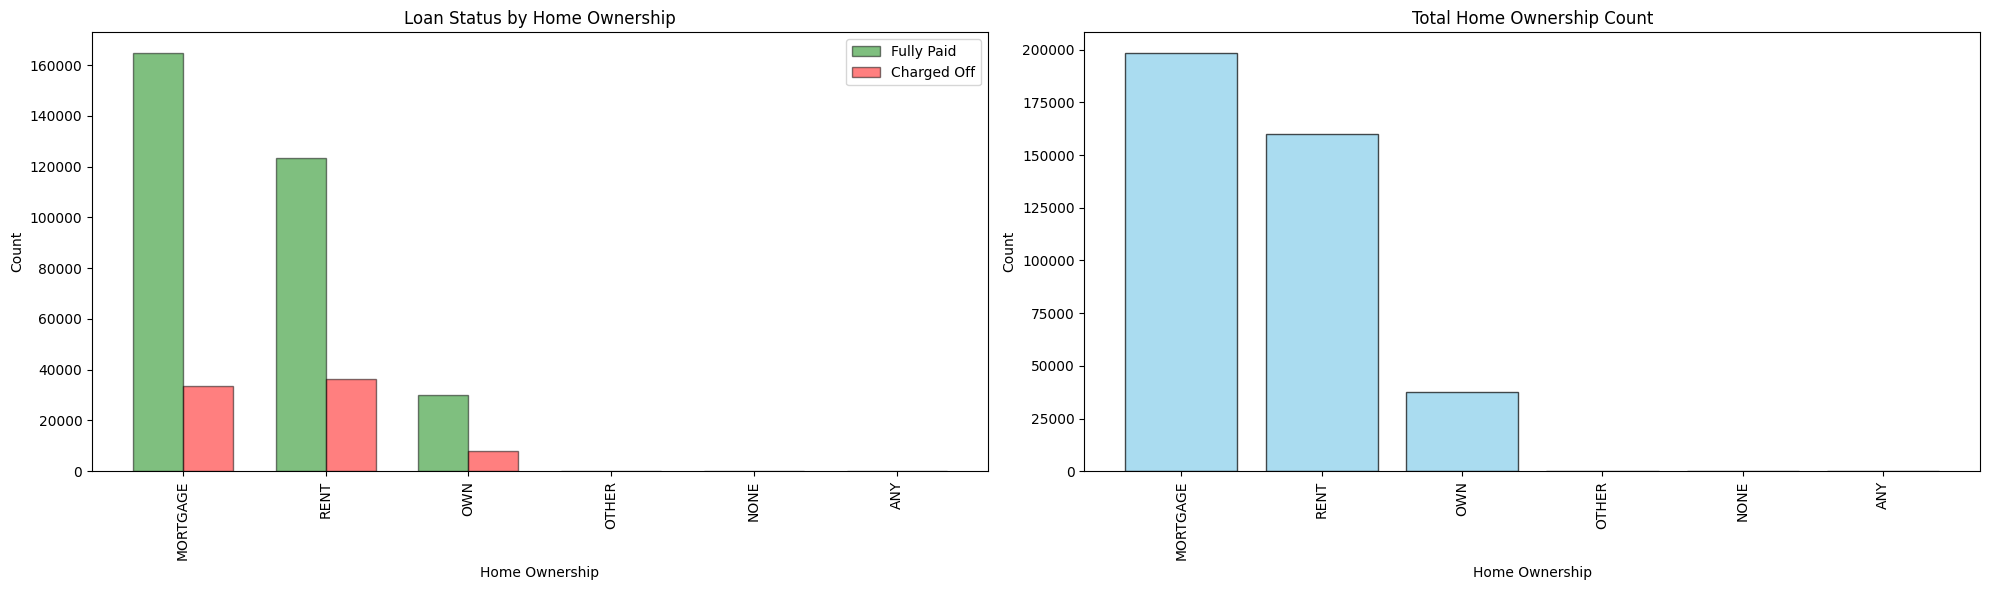

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Plot 1: Loan Status by Home Ownership ---
ownership_counts = df.groupby(['home_ownership', 'loan_status'], observed=True).size().unstack(fill_value=0)
ownership_counts = ownership_counts.sort_values('Fully Paid', ascending=False)
x = np.arange(len(ownership_counts))
bar_width = 0.35

for i, status in enumerate(['Fully Paid', 'Charged Off']):
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    axes[0].bar(x + offset, ownership_counts[status], width=bar_width,
                color=color_map[status], edgecolor='black', alpha=0.5, label=status)

axes[0].set(title="Loan Status by Home Ownership", xlabel="Home Ownership", ylabel="Count",
            xticks=x, xticklabels=ownership_counts.index)
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(loc='upper right')

# --- Plot 2: Total Home Ownership Count ---
ownership_total = df['home_ownership'].value_counts().sort_values(ascending=False)
axes[1].bar(ownership_total.index, ownership_total.values,
            color='skyblue', edgecolor='black', alpha=0.7)

axes[1].set(title="Total Home Ownership Count", xlabel="Home Ownership", ylabel="Count")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [20]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

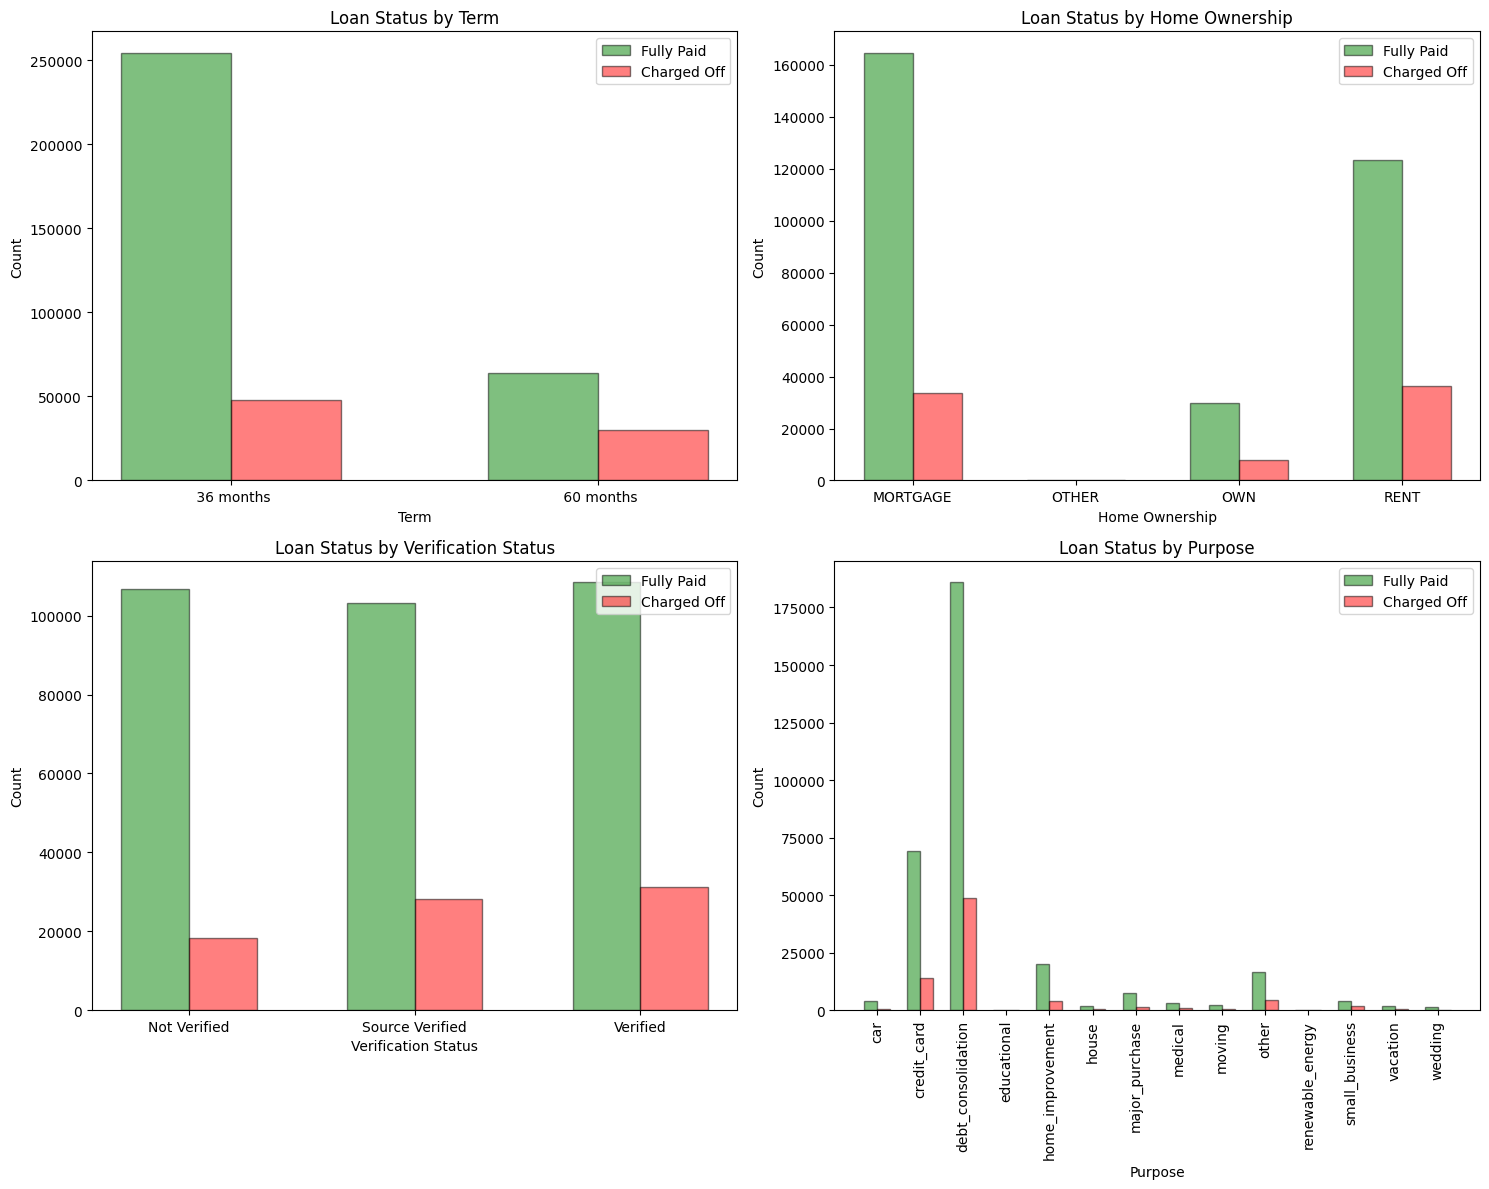

In [21]:
bar_width = 0.3
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plot_info = {
    'term': {'ax': axes[0, 0], 'title': "Loan Status by Term", 'rotation': 0},
    'home_ownership': {'ax': axes[0, 1], 'title': "Loan Status by Home Ownership", 'rotation': 0},
    'verification_status': {'ax': axes[1, 0], 'title': "Loan Status by Verification Status", 'rotation': 0},
    'purpose': {'ax': axes[1, 1], 'title': "Loan Status by Purpose", 'rotation': 90}
}

for col, info in plot_info.items():
    counts = df.groupby([col, 'loan_status'], observed=True).size().unstack(fill_value=0)
    x = np.arange(len(counts))
    ax = info['ax']

    for i, status in enumerate(['Fully Paid', 'Charged Off']):
        offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
        ax.bar(x + offset, counts[status], width=bar_width,
               label=status, color=color_map[status], edgecolor='black', alpha=0.5)

    ax.set(title=info['title'], xlabel=col.replace('_', ' ').title(), ylabel='Count',
           xticks=x, xticklabels=counts.index)
    ax.tick_params(axis='x', rotation=info['rotation'])
    ax.legend()

plt.tight_layout()
plt.show()

In [22]:
df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

## ✔️ `int_rate` & `annual_inc`

> - `int_rate`: Interest Rate on the loan
> - `annual_inc`: The self-reported annual income provided by the borrower during registration

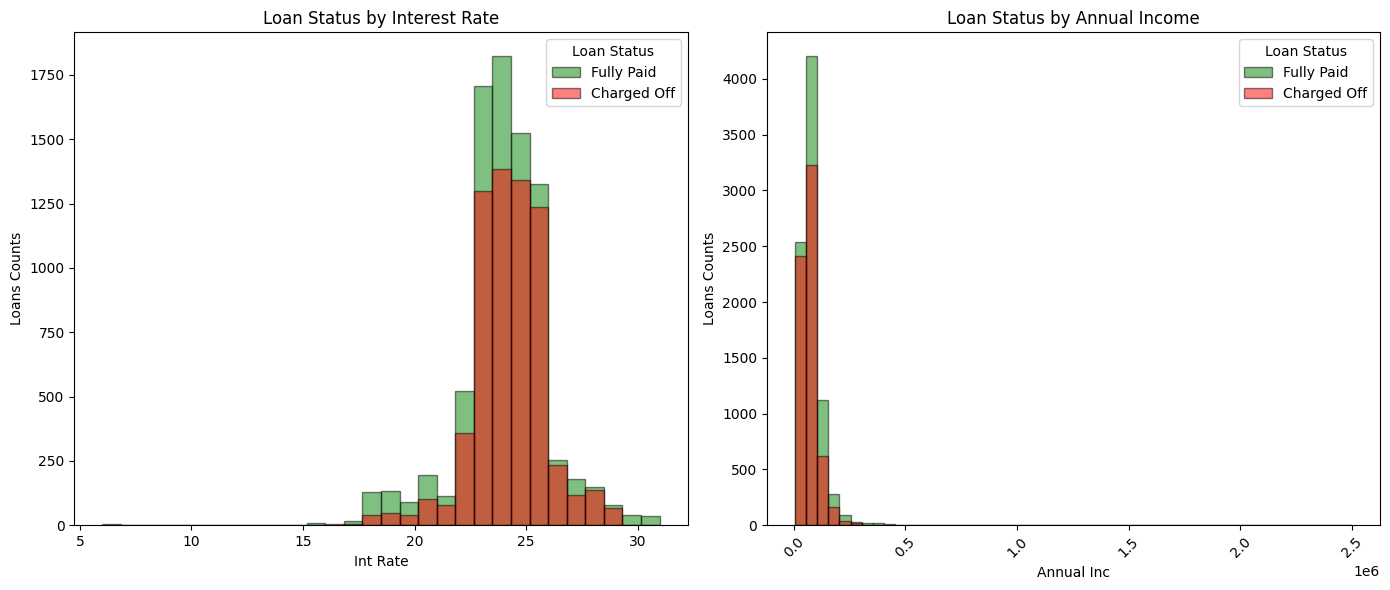

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_info = {
    'int_rate': {'title': 'Loan Status by Interest Rate', 'bins': 30, 'rotation': 0},
    'annual_inc': {'title': 'Loan Status by Annual Income', 'bins': 50, 'rotation': 45}
}

for ax, (col, info) in zip(axes, plot_info.items()):
    bin_edges = np.histogram_bin_edges(df1[col], bins=info['bins'])
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]

    for status in ['Fully Paid', 'Charged Off']:
        values = df1[df1['loan_status'] == status][col]
        counts, _ = np.histogram(values, bins=bin_edges)
        ax.bar(bin_centers, counts, width=bin_width,
               alpha=0.5, color=color_map[status], edgecolor='black', label=status)

    ax.set(title=info['title'], xlabel=col.replace('_', ' ').title(), ylabel='Loans Counts')
    ax.tick_params(axis='x', rotation=info['rotation'])
    ax.legend(title='Loan Status')

plt.tight_layout()
plt.show()

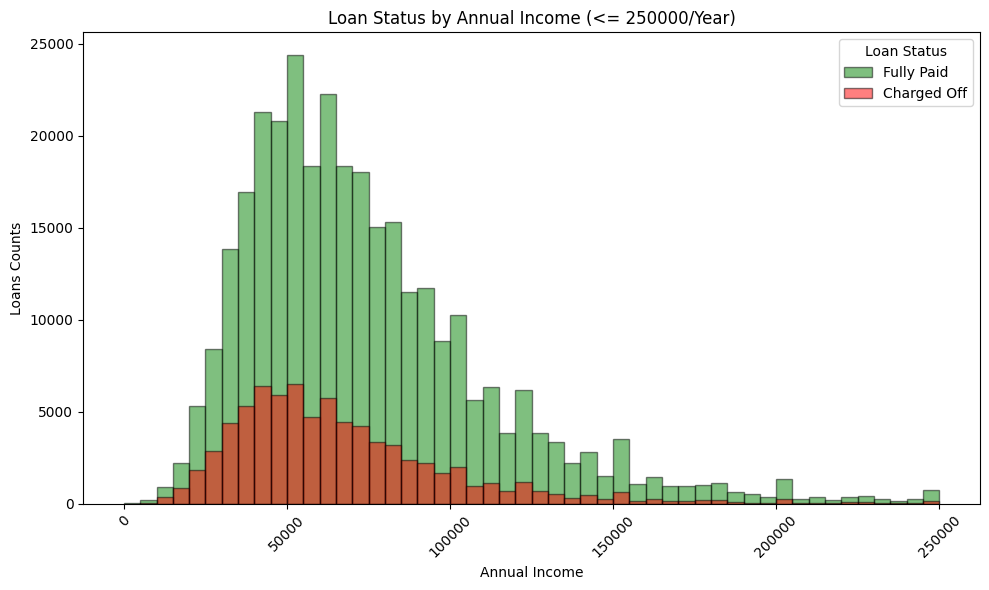

In [24]:
df1 = df[df['annual_inc'] <= 250000]

fig, ax = plt.subplots(figsize=(10, 6))

bin_edges = np.histogram_bin_edges(df1['annual_inc'], bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

for status in ['Fully Paid', 'Charged Off']:
    values = df1[df1['loan_status'] == status]['annual_inc']
    counts, _ = np.histogram(values, bins=bin_edges)
    ax.bar(bin_centers, counts, width=bin_width, alpha=0.5,
           color=color_map[status], edgecolor='black', label=status)

ax.set(title="Loan Status by Annual Income (<= 250000/Year)",
       xlabel="Annual Income", ylabel="Loans Counts")
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Loan Status')

plt.tight_layout()
plt.show()

In [25]:
print((df[df.annual_inc >= 250000].shape[0] / df.shape[0]) * 100)
print((df[df.annual_inc >= 1000000].shape[0] / df.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [26]:
df.loc[df.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [27]:
df.loc[df.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

## ✔️ `emp_title` & `emp_length`

> - `emp_title`: The job title supplied by the Borrower when applying for the loan.
> - `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [28]:
print(df.emp_title.isna().sum())
print(df.emp_title.nunique())

22927
173105


In [29]:
df['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

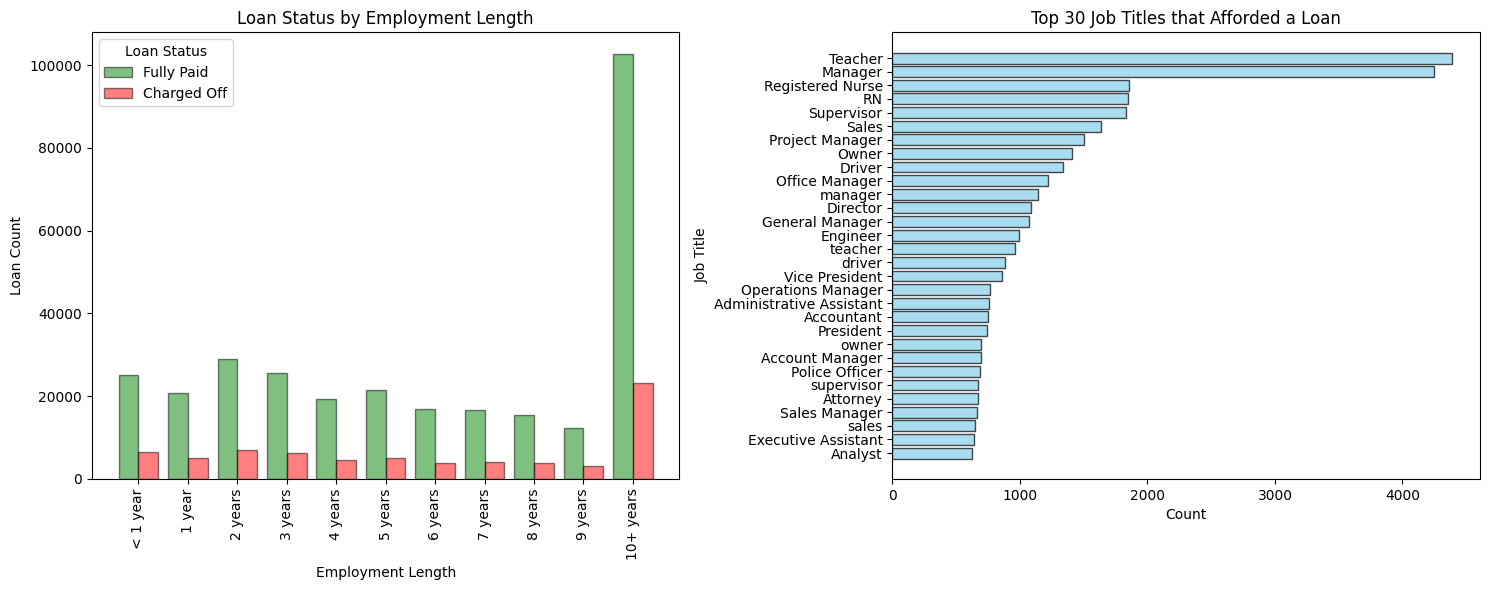

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: Loan Status by Employment Length ---
emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
             '6 years', '7 years', '8 years', '9 years', '10+ years']

emp_counts = df.groupby(['emp_length', 'loan_status'], observed=True).size().unstack(fill_value=0).reindex(emp_order)
x = np.arange(len(emp_order))
bar_width = 0.4
ax = axes[0]

for i, status in enumerate(['Fully Paid', 'Charged Off']):
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    ax.bar(x + offset, emp_counts[status], width=bar_width, color=color_map[status],
           edgecolor='black', alpha=0.5, label=status)

ax.set(title='Loan Status by Employment Length', xlabel='Employment Length', ylabel='Loan Count',
       xticks=x, xticklabels=emp_order)
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Loan Status')

# --- Plot 2: Top 30 Job Titles ---
top_jobs = df['emp_title'].value_counts().head(30)
axes[1].barh(top_jobs.index[::-1], top_jobs.values[::-1], color='skyblue',
             edgecolor='black', alpha=0.7)
axes[1].set(title="Top 30 Job Titles that Afforded a Loan", xlabel="Count", ylabel="Job Title")

plt.tight_layout()
plt.show()

## ✔️ `issue_d`, `earliest_cr_line`

> - `issue_d`: The month which the loan was funded
> - `earliest_cr_line`: The month the borrower's earliest reported credit line was opened

In [31]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Nov-1959       1
Jul-1960       1
Dec-1956       1
Jan-1953       1
Aug-1964       1
Name: count, Length: 684, dtype: int64

In [32]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

C:\Users\fabio\AppData\Local\Temp\ipykernel_12760\3329974766.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


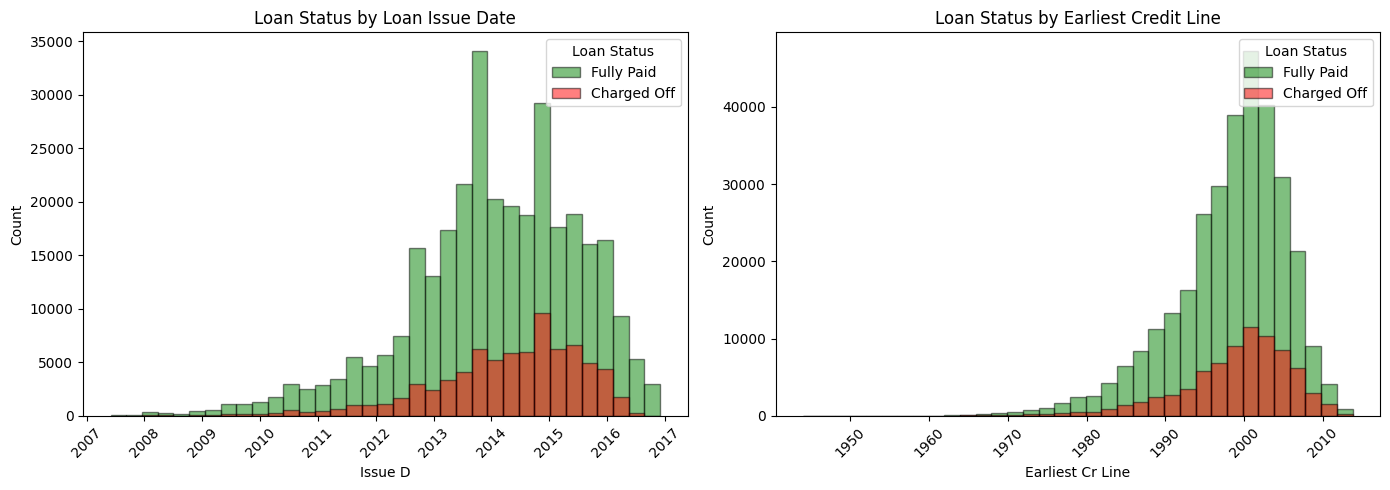

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

date_cols = {
    'issue_d': "Loan Status by Loan Issue Date",
    'earliest_cr_line': "Loan Status by Earliest Credit Line"
}

bins = 35

for ax, (col, title) in zip(axes, date_cols.items()):
    df[col] = pd.to_datetime(df[col])
    bin_edges = pd.date_range(df[col].min(), df[col].max(), periods=bins + 1)
    bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
    bar_width = (bin_edges[1] - bin_edges[0])

    for status in ['Fully Paid', 'Charged Off']:
        values = df[df['loan_status'] == status][col]
        counts, _ = np.histogram(values, bins=bin_edges)
        ax.bar(bin_centers, counts, width=bar_width, color=color_map[status],
               edgecolor='black', alpha=0.5, label=status)

    ax.set(title=title, xlabel=col.replace('_', ' ').title(), ylabel='Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Loan Status', loc='upper right')

plt.tight_layout()
plt.show()


`issue_d` would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [34]:
df.drop('issue_d', axis=1, inplace=True)

`earliest_cr_line` appears to be a historical time stamp feature. Extract the year from this feature using a `.apply()` function, then convert it to a numeric feature.

In [35]:
df['earliest_cr_line'] = df.earliest_cr_line.dt.year

In [36]:
df.earliest_cr_line.nunique()

65

In [37]:
df.earliest_cr_line.value_counts()

earliest_cr_line
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1950        3
1951        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

## ✔️ `title`

> - `title`: The loan title provided by the borrower

In [38]:
df.title.isna().sum()

np.int64(1756)

In [39]:
df['title'] = df.title.str.lower()

In [40]:
df.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

`title` will be removed because we have the `purpose` column with is generated from it.

## ✔️ `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
> - `open_acc`: The number of open credit lines in the borrower's credit file.
> - `revol_bal`: Total credit revolving balance
> - `revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
> - `total_acc`: The total number of credit lines currently in the borrower's credit file

In [41]:
df.dti.value_counts()

dti
0.00      313
14.40     310
19.20     302
16.80     301
18.00     300
         ... 
138.03      1
189.90      1
55.53       1
40.49       1
41.11       1
Name: count, Length: 4262, dtype: int64

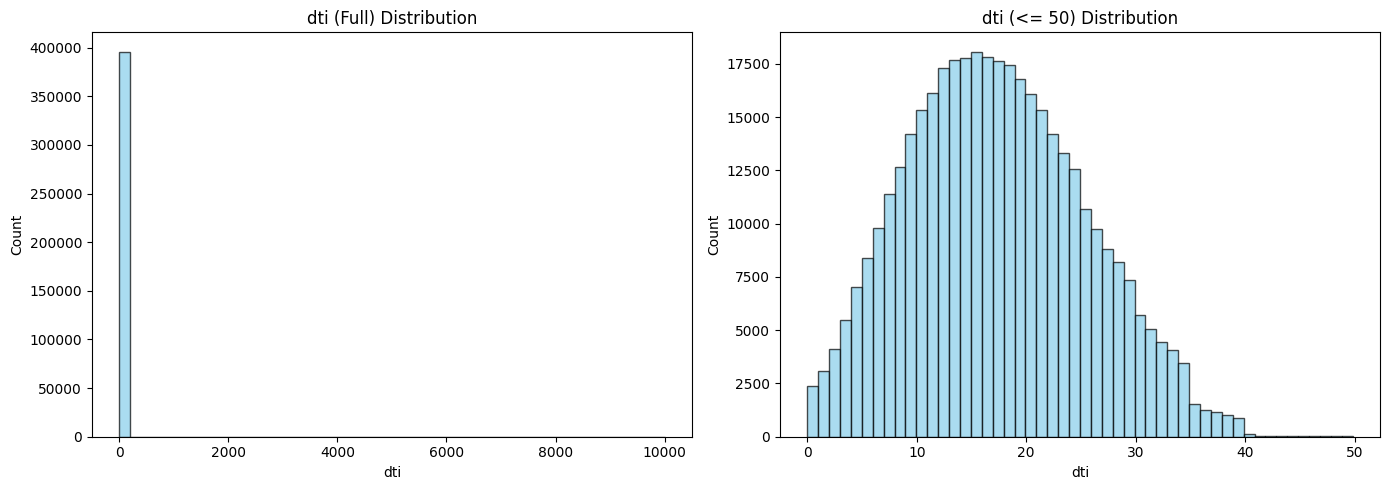

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dti_configs = {
    'Full': df['dti'],
    '<= 50': df[df['dti'] <= 50]['dti']
}

for ax, (label, data) in zip(axes, dti_configs.items()):
    counts, bin_edges = np.histogram(data, bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bar_width = bin_edges[1] - bin_edges[0]

    ax.bar(bin_centers, counts, width=bar_width, alpha=0.7,
           edgecolor='black', color='skyblue')
    ax.set(title=f"dti ({label}) Distribution", xlabel="dti", ylabel="Count")

plt.tight_layout()
plt.show()


In [43]:
print(df[df['dti']>=40].shape)

(296, 26)


In [44]:
df.loc[df['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     26
Charged Off     9
Name: count, dtype: int64

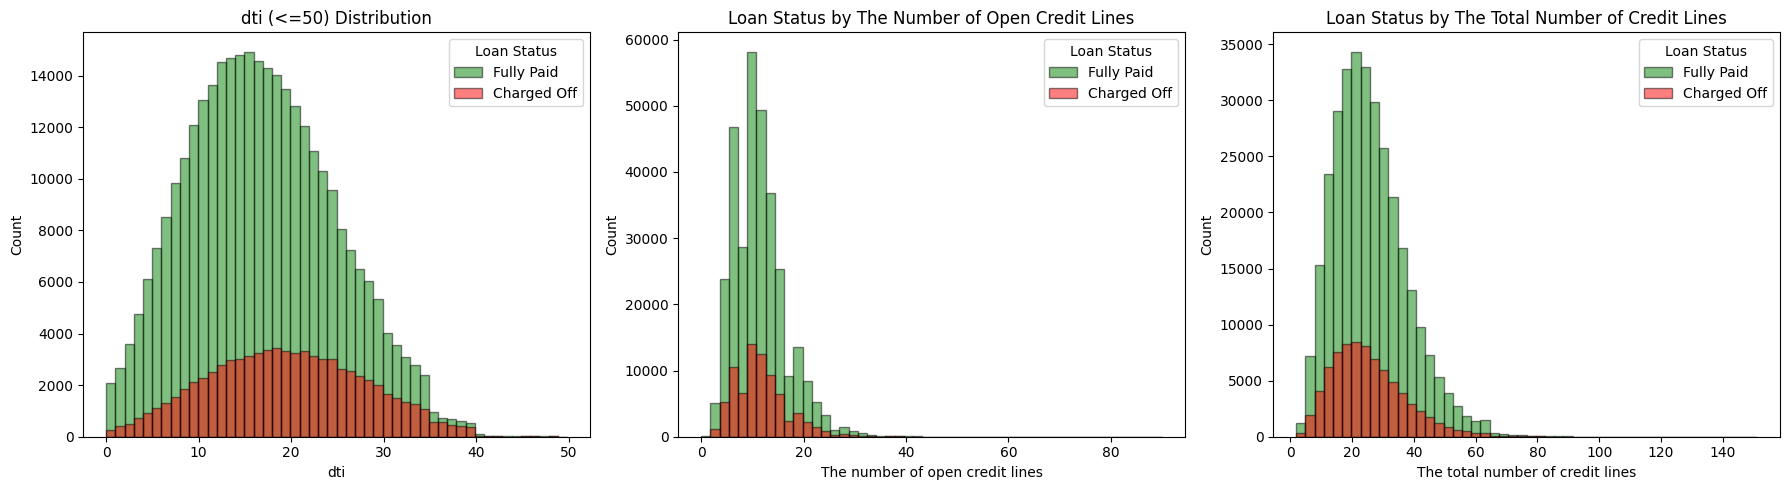

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_info = {
    'dti': {
        'data': df[df['dti'] <= 50],
        'title': 'dti (<=50) Distribution',
        'xlabel': 'dti',
        'alpha': 0.5
    },
    'open_acc': {
        'data': df,
        'title': 'Loan Status by The Number of Open Credit Lines',
        'xlabel': 'The number of open credit lines',
        'alpha': 0.5
    },
    'total_acc': {
        'data': df,
        'title': 'Loan Status by The Total Number of Credit Lines',
        'xlabel': 'The total number of credit lines',
        'alpha': 0.5
    }
}

for ax, (col, info) in zip(axes, plot_info.items()):
    data = info['data']
    bin_edges = np.histogram_bin_edges(data[col], bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bar_width = bin_edges[1] - bin_edges[0]

    for status in ['Fully Paid', 'Charged Off']:
        values = data[data['loan_status'] == status][col]
        counts, _ = np.histogram(values, bins=bin_edges)
        ax.bar(bin_centers, counts, width=bar_width,
               color=color_map[status], edgecolor='black', alpha=info['alpha'], label=status)

    ax.set(title=info['title'], xlabel=info['xlabel'], ylabel='Count')
    ax.legend(title='Loan Status')

plt.tight_layout()
plt.show()


In [46]:
print(df.shape)
print(df[df.open_acc > 40].shape)

(396030, 26)
(217, 26)


In [47]:
print(df.shape)
print(df[df.total_acc > 80].shape)

(396030, 26)
(266, 26)


In [48]:
print(df.shape)
print(df[df.revol_util > 120].shape)

(396030, 26)
(27, 26)


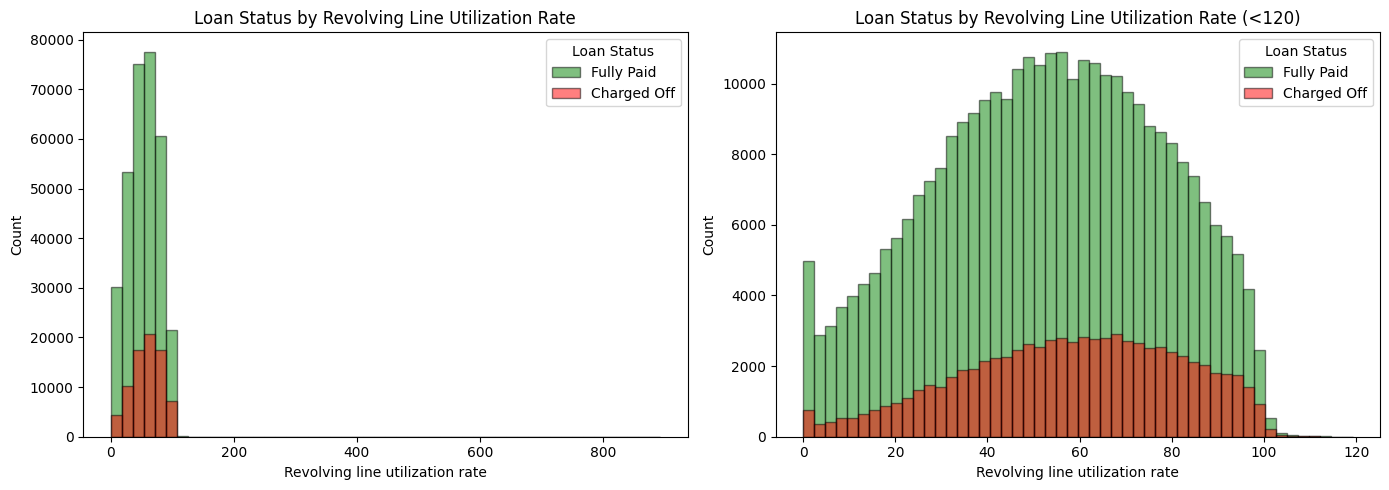

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_info = {
    'Full': {
        'data': df['revol_util'].dropna(),
        'df': df,
        'title': "Loan Status by Revolving Line Utilization Rate"
    },
    '<120': {
        'data': df[df['revol_util'] < 120]['revol_util'].dropna(),
        'df': df[df['revol_util'] < 120],
        'title': "Loan Status by Revolving Line Utilization Rate (<120)"
    }
}

for ax, (label, info) in zip(axes, plot_info.items()):
    bin_edges = np.histogram_bin_edges(info['data'], bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bar_width = bin_edges[1] - bin_edges[0]

    for status in ['Fully Paid', 'Charged Off']:
        values = info['df'][info['df']['loan_status'] == status]['revol_util'].dropna()
        counts, _ = np.histogram(values, bins=bin_edges)
        ax.bar(bin_centers, counts, width=bar_width,
               color=color_map[status], edgecolor='black', alpha=0.5, label=status)

    ax.set(title=info['title'], xlabel="Revolving line utilization rate", ylabel="Count")
    ax.legend(title="Loan Status")

plt.tight_layout()
plt.show()


In [50]:
df[df.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,Verified,Fully Paid,debt_consolidation,debt consolidation,14.67,1998,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,00813


In [51]:
print(df.shape)
print(df[df.revol_bal > 250000].shape)

(396030, 26)
(397, 26)


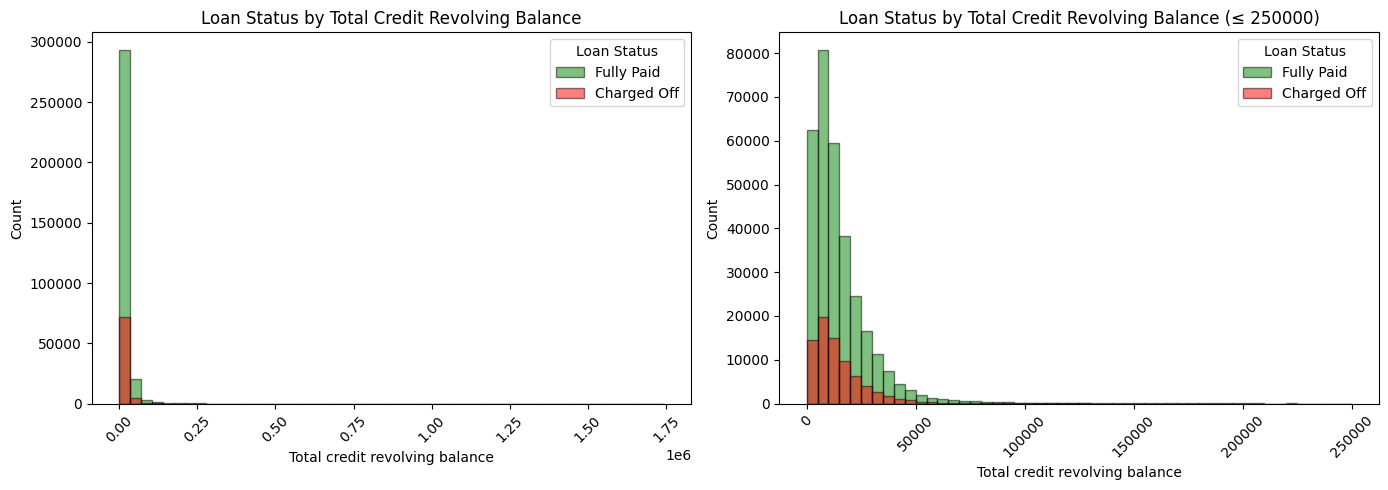

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_info = {
    'Full': {
        'data': df['revol_bal'].dropna(),
        'df': df,
        'title': "Loan Status by Total Credit Revolving Balance"
    },
    '≤250k': {
        'data': df[df['revol_bal'] <= 250000]['revol_bal'].dropna(),
        'df': df[df['revol_bal'] <= 250000],
        'title': "Loan Status by Total Credit Revolving Balance (≤ 250000)"
    }
}

for ax, (label, info) in zip(axes, plot_info.items()):
    bin_edges = np.histogram_bin_edges(info['data'], bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bar_width = bin_edges[1] - bin_edges[0]

    for status in ['Fully Paid', 'Charged Off']:
        values = info['df'][info['df']['loan_status'] == status]['revol_bal'].dropna()
        counts, _ = np.histogram(values, bins=bin_edges)
        ax.bar(bin_centers, counts, width=bar_width,
               color=color_map[status], edgecolor='black', alpha=0.5, label=status)

    ax.set(title=info['title'], xlabel="Total credit revolving balance", ylabel="Count")
    ax.legend(title="Loan Status")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [53]:
df.loc[df.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     351
Charged Off     46
Name: count, dtype: int64

- It seems that the smaller the `dti` the more likely that the loan will not be paid.
- Only `217` borrower have more than `40` open credit lines.
- Only `266` borrower have more than `80` credit line in the borrower credit file.

## ✔️ `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

> - `pub_rec`: Number of derogatory public records
> - `initial_list_status`: The initial listing status of the loan. Possible values are – W, F
> - `application_type`: Indicates whether the loan is an individual application or a joint application with two co-borrowers
> - `mort_acc`: Number of mortgage accounts
> - `pub_rec_bankruptcies`: Number of public record bankruptcies

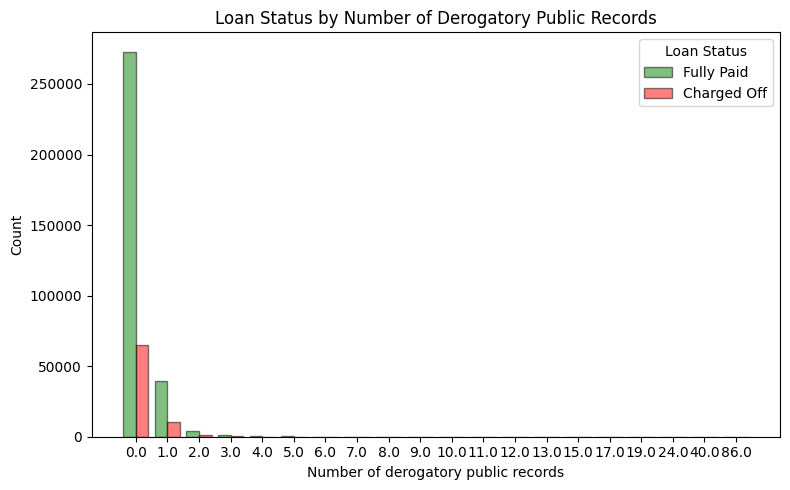

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))

counts = {
    status: df[df['loan_status'] == status]['pub_rec'].value_counts().sort_index()
    for status in ['Fully Paid', 'Charged Off']
}

all_indices = sorted(set(counts['Fully Paid'].index).union(counts['Charged Off'].index))
x = np.arange(len(all_indices))
bar_width = 0.4

for i, status in enumerate(['Fully Paid', 'Charged Off']):
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    values = [counts[status].get(idx, 0) for idx in all_indices]
    ax.bar(x + offset, values, width=bar_width,
           color=color_map[status], edgecolor='black', alpha=0.5, label=status)

ax.set(title="Loan Status by Number of Derogatory Public Records",
       xlabel="Number of derogatory public records", ylabel="Count",
       xticks=x, xticklabels=all_indices)
ax.legend(title="Loan Status", loc='upper right')

plt.tight_layout()
plt.show()

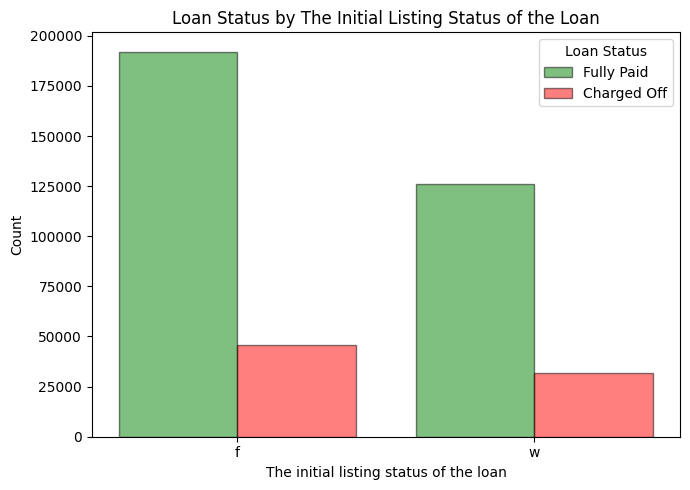

In [55]:
fig, ax = plt.subplots(figsize=(7, 5))

counts = {
    status: df[df['loan_status'] == status]['initial_list_status'].value_counts().sort_index()
    for status in ['Fully Paid', 'Charged Off']
}

all_statuses = sorted(set(counts['Fully Paid'].index).union(counts['Charged Off'].index))
x = np.arange(len(all_statuses))
bar_width = 0.4

for i, status in enumerate(['Fully Paid', 'Charged Off']):
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    values = [counts[status].get(s, 0) for s in all_statuses]
    ax.bar(x + offset, values, width=bar_width,
           color=color_map[status], edgecolor='black', alpha=0.5, label=status)

ax.set(title="Loan Status by The Initial Listing Status of the Loan",
       xlabel="The initial listing status of the loan", ylabel="Count",
       xticks=x, xticklabels=all_statuses)
ax.legend(title="Loan Status", loc='upper right')

plt.tight_layout()
plt.show()


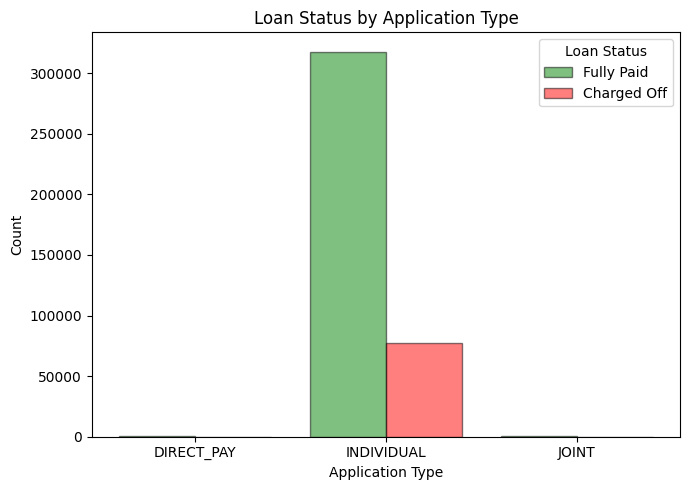

In [56]:
fig, ax = plt.subplots(figsize=(7, 5))

counts = {
    status: df[df['loan_status'] == status]['application_type'].value_counts().sort_index()
    for status in ['Fully Paid', 'Charged Off']
}

all_types = sorted(set(counts['Fully Paid'].index).union(counts['Charged Off'].index))
x = np.arange(len(all_types))
bar_width = 0.4

for status in ['Fully Paid', 'Charged Off']:
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    values = [counts[status].get(app_type, 0) for app_type in all_types]
    ax.bar(x + offset, values, width=bar_width,
           color=color_map[status], edgecolor='black', alpha=0.5, label=status)

ax.set(title="Loan Status by Application Type",
       xlabel="Application Type", ylabel="Count",
       xticks=x, xticklabels=all_types)
ax.legend(title="Loan Status", loc='upper right')

plt.tight_layout()
plt.show()

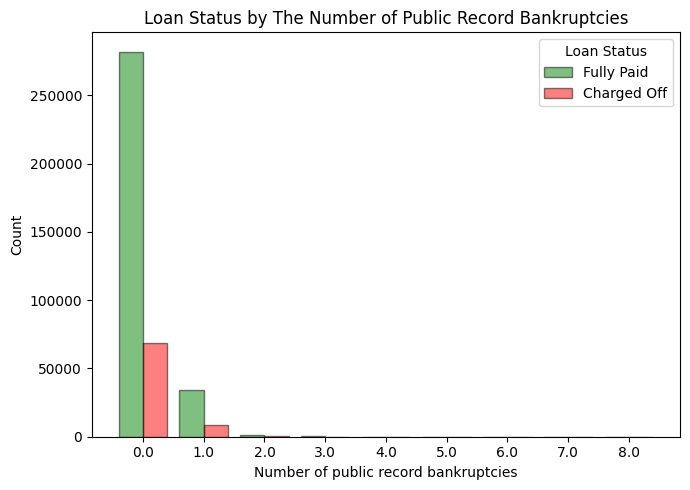

In [57]:
fig, ax = plt.subplots(figsize=(7, 5))

counts = {
    status: df[df['loan_status'] == status]['pub_rec_bankruptcies'].value_counts().sort_index()
    for status in ['Fully Paid', 'Charged Off']
}

all_values = sorted(set(counts['Fully Paid'].index).union(counts['Charged Off'].index))
x = np.arange(len(all_values))
bar_width = 0.4

for status in ['Fully Paid', 'Charged Off']:
    offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
    values = [counts[status].get(v, 0) for v in all_values]
    ax.bar(x + offset, values, width=bar_width,
           color=color_map[status], edgecolor='black', alpha=0.5, label=status)

ax.set(title="Loan Status by The Number of Public Record Bankruptcies",
       xlabel="Number of public record bankruptcies", ylabel="Count",
       xticks=x, xticklabels=all_values)
ax.legend(title="Loan Status", loc='upper right')

plt.tight_layout()
plt.show()

In [58]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [59]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

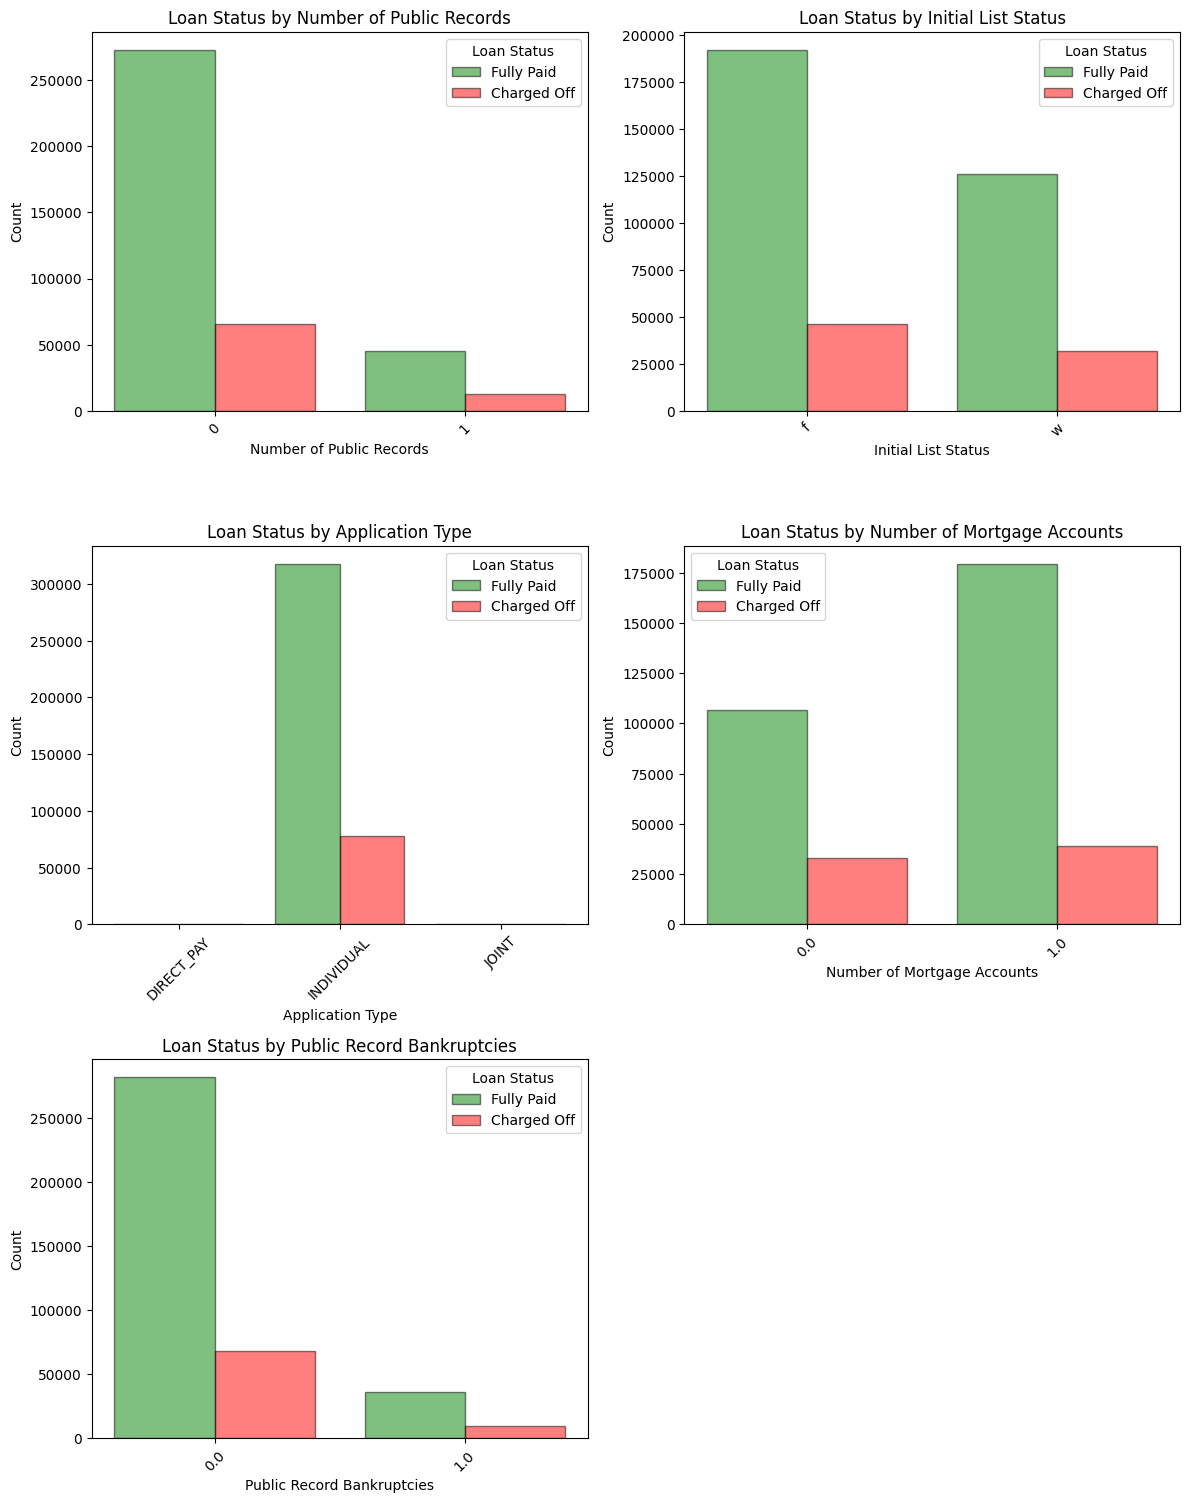

In [60]:
plot_info = {
    'pub_rec': 'Number of Public Records',
    'initial_list_status': 'Initial List Status',
    'application_type': 'Application Type',
    'mort_acc': 'Number of Mortgage Accounts',
    'pub_rec_bankruptcies': 'Public Record Bankruptcies'
}

fig, axes = plt.subplots(6, 2, figsize=(12, 30))
axes = axes.flatten()

for ax, (col, title) in zip(axes, plot_info.items()):
    counts = df.groupby([col, 'loan_status'], observed=True).size().unstack(fill_value=0)
    categories = sorted(counts.index)
    x = np.arange(len(categories))
    bar_width = 0.4

    for status in ['Fully Paid', 'Charged Off']:
        offset = (-1 if status == 'Fully Paid' else 1) * bar_width / 2
        ax.bar(x + offset, counts[status], width=bar_width,
               color=color_map[status], edgecolor='black', alpha=0.5, label=status)

    ax.set(title=f"Loan Status by {title}", xlabel=title, ylabel="Count",
           xticks=x, xticklabels=categories)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Loan Status')

# Remove any extra unused subplots
for ax in axes[len(plot_info):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

## 📈 How numeric features correlate with the target variable?

In [61]:
df['loan_status'] = df.loan_status.map({'Fully Paid':1, 'Charged Off':0})

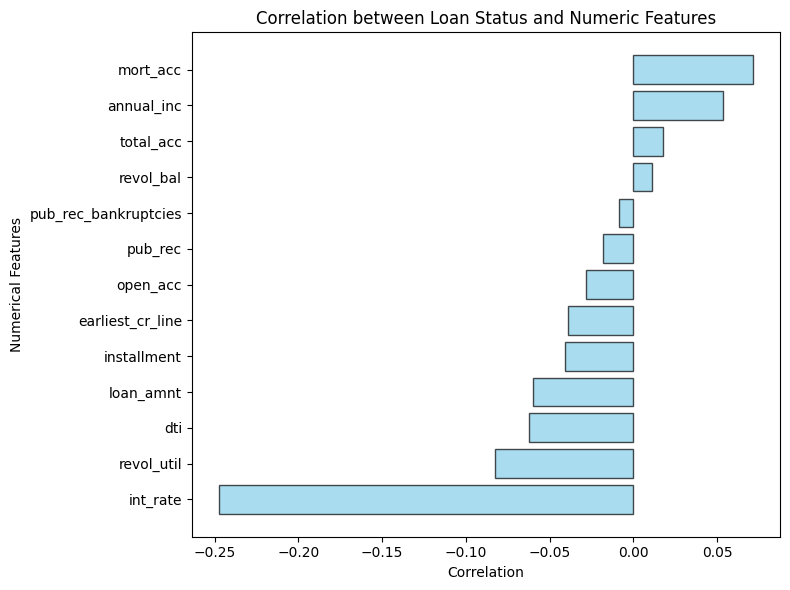

In [62]:
df_encoded = df.copy()
if df_encoded['loan_status'].dtype == 'object':
    df_encoded['loan_status'] = df_encoded['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select numeric columns and compute correlation
numeric_df = df_encoded.select_dtypes(include='number')
correlations = numeric_df.corr()['loan_status'].drop('loan_status').sort_values()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(correlations.index, correlations.values, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
ax.set_title("Correlation between Loan Status and Numeric Features")
ax.set_xlabel("Correlation")
ax.set_ylabel("Numerical Features")
plt.tight_layout()
plt.show()

# 🔄 Data PreProcessing

**Section Goals:** 
> - Remove or fill any missing data. 
> - Remove unnecessary or repetitive features. 
> - Convert categorical string features to dummy variables.

In [63]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (396030, 26)


In [64]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

In [65]:
df.emp_title.nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [66]:
df.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [67]:
df.emp_length.unique()

array(['< 1 year', '4 years', '1 year', '10+ years', '2 years', '6 years',
       '3 years', '5 years', '8 years', '7 years', '9 years', nan],
      dtype=object)

In [68]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

< 1 year years in this position:
loan_status
1    0.793128
0    0.206872
Name: proportion, dtype: float64
4 years years in this position:
loan_status
1    0.807615
0    0.192385
Name: proportion, dtype: float64
1 year years in this position:
loan_status
1    0.800865
0    0.199135
Name: proportion, dtype: float64
10+ years years in this position:
loan_status
1    0.815814
0    0.184186
Name: proportion, dtype: float64
2 years years in this position:
loan_status
1    0.806738
0    0.193262
Name: proportion, dtype: float64
6 years years in this position:
loan_status
1    0.810806
0    0.189194
Name: proportion, dtype: float64
3 years years in this position:
loan_status
1    0.804769
0    0.195231
Name: proportion, dtype: float64
5 years years in this position:
loan_status
1    0.807813
0    0.192187
Name: proportion, dtype: float64
8 years years in this position:
loan_status
1    0.80024
0    0.19976
Name: proportion, dtype: float64
7 years years in this position:
loan_status
1    0.8052

Charge off rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [69]:
df.drop('emp_length', axis=1, inplace=True)

### `title`

In [70]:
df.title.value_counts().head()

title
debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: count, dtype: int64

In [71]:
df.purpose.value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [72]:
df.drop('title', axis=1, inplace=True)

### `revol_util` & `pub_rec_bankruptcies`
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [73]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [74]:
df.dropna(inplace=True)

## 🔪 Train Test Split

In [75]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.2013273223952136
Weight of negative values 0.7986726776047864


In [76]:
train, test = train_test_split(df, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(239869, 23)
(118145, 23)


In [77]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

### `mort_acc`

There are several strategies for handling missing data. One option is to use a simple predictive model, such as linear regression, to estimate the missing values. Alternatively, you could fill them with a statistical measure like the column mean, or convert the data into categorical bins and treat NaN as its own category. There's no universally correct method—it depends on the context and the nature of the data.

In [78]:
mode_value = X_train['mort_acc'].mode()[0]

X_train['mort_acc'] = X_train['mort_acc'].fillna(mode_value)
X_test['mort_acc'] = X_test['mort_acc'].fillna(mode_value)

## ⚖️ Feature Selection

**Chi-squared statistic for categorical features & ANOVA F-Statistic for numerical features**

In [79]:
def feature_selection_iv_summary(X_train, y_train):
    X_train_cat = X_train.select_dtypes(include='object').copy()
    X_train_num = X_train.select_dtypes(include='number').copy()

    X_train_num.fillna(X_train_num.mean(), inplace=True)

    chi2_check = {'Feature': [], 'Test Type': [], 'p-value': []}
    for column in X_train_cat:
        chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
        chi2_check['Feature'].append(column)
        chi2_check['Test Type'].append("Chi-squared")
        chi2_check['p-value'].append(round(p, 10))

    chi2_result = pd.DataFrame(data=chi2_check)

    F_statistic, p_values = f_classif(X_train_num, y_train)
    anova_result = pd.DataFrame(data={
        'Feature': X_train_num.columns.values,
        'Test Type': 'ANOVA F',
        'p-value': p_values.round(decimals=10)
    })

    feature_stats = pd.concat([chi2_result, anova_result], ignore_index=True)

    feature_stats.sort_values(by=['Test Type', 'p-value'], ascending=[True, True], ignore_index=True, inplace=True)

    return feature_stats


feature_stats = feature_selection_iv_summary(X_train, y_train)
feature_stats

,Feature,Test Type,p-value
0,loan_amnt,ANOVA F,0.000000e+00
1,int_rate,ANOVA F,0.000000e+00
2,installment,ANOVA F,0.000000e+00
3,annual_inc,ANOVA F,0.000000e+00
4,dti,ANOVA F,0.000000e+00
5,earliest_cr_line,ANOVA F,0.000000e+00
6,open_acc,ANOVA F,0.000000e+00
7,revol_util,ANOVA F,0.000000e+00
8,total_acc,ANOVA F,0.000000e+00
9,mort_acc,ANOVA F,0.000000e+00


In [80]:
low_significance_features = feature_stats[feature_stats['p-value'] >= 0.5]['Feature'].tolist()
low_significance_features

[]

In [81]:
X_train.drop(columns=low_significance_features,inplace=True)
X_test.drop(columns=low_significance_features,inplace=True)

**Multicollinearity**

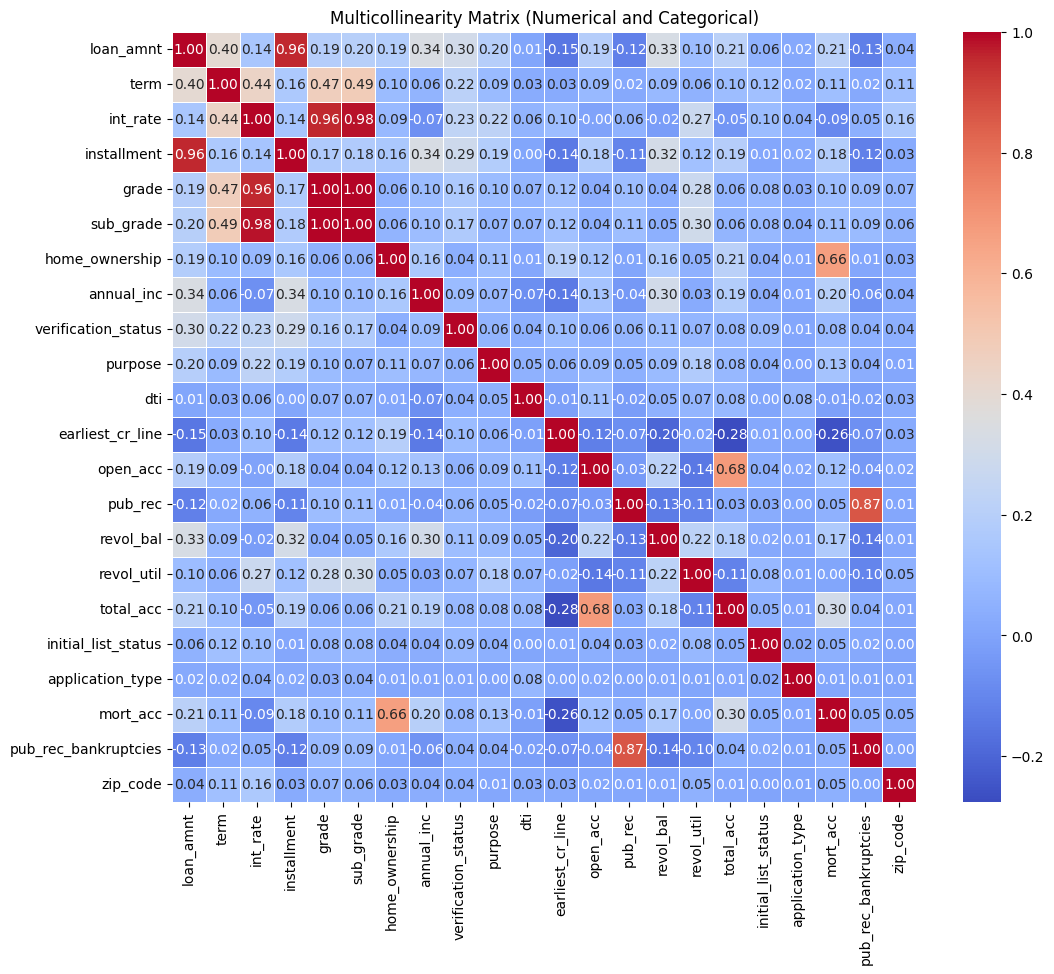

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
loan_amnt,1.0000,0.3987,0.1443,0.9553,0.1903,0.2001,0.1863,0.3419,0.3041,0.1959,0.0066,-0.1509,0.1910,-0.1171,0.3296,0.0984,0.2144,0.0554,0.0232,0.2104,-0.1260,0.0376
term,0.3987,1.0000,0.4374,0.1585,0.4711,0.4855,0.0978,0.0612,0.2170,0.0911,0.0315,0.0261,0.0852,0.0216,0.0871,0.0555,0.1028,0.1177,0.0152,0.1082,0.0224,0.1142
int_rate,0.1443,0.4374,1.0000,0.1377,0.9567,0.9808,0.0873,-0.0709,0.2349,0.2232,0.0611,0.1013,-0.0032,0.0576,-0.0216,0.2734,-0.0478,0.0961,0.0409,-0.0927,0.0477,0.1625
installment,0.9553,0.1585,0.1377,1.0000,0.1690,0.1769,0.1565,0.3351,0.2894,0.1867,0.0048,-0.1382,0.1783,-0.1085,0.3171,0.1206,0.1916,0.0087,0.0193,0.1785,-0.1193,0.0259
grade,0.1903,0.4711,0.9567,0.1690,1.0000,0.9999,0.0555,0.0951,0.1601,0.0978,0.0680,0.1162,0.0378,0.0982,0.0396,0.2762,0.0586,0.0770,0.0336,0.1003,0.0862,0.0700
sub_grade,0.2001,0.4855,0.9808,0.1769,0.9999,1.0000,0.0607,0.1004,0.1697,0.0696,0.0709,0.1226,0.0442,0.1062,0.0454,0.3016,0.0639,0.0830,0.0442,0.1088,0.0931,0.0584
home_ownership,0.1863,0.0978,0.0873,0.1565,0.0555,0.0607,1.0000,0.1570,0.0425,0.1066,0.0087,0.1940,0.1245,0.0083,0.1597,0.0485,0.2123,0.0355,0.0109,0.6622,0.0126,0.0262
annual_inc,0.3419,0.0612,-0.0709,0.3351,0.0951,0.1004,0.1570,1.0000,0.0949,0.0736,-0.0714,-0.1361,0.1322,-0.0368,0.3025,0.0261,0.1867,0.0381,0.0109,0.1984,-0.0577,0.0350
verification_status,0.3041,0.2170,0.2349,0.2894,0.1601,0.1697,0.0425,0.0949,1.0000,0.0600,0.0405,0.0952,0.0571,0.0642,0.1062,0.0725,0.0831,0.0878,0.0126,0.0804,0.0385,0.0390
purpose,0.1959,0.0911,0.2232,0.1867,0.0978,0.0696,0.1066,0.0736,0.0600,1.0000,0.0509,0.0572,0.0875,0.0463,0.0928,0.1755,0.0793,0.0437,0.0000,0.1300,0.0377,0.0126


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

def cramers_v(x, y):
    """Calculate Cramér's V for categorical-categorical associations."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def correlation_ratio(categories, measurements):
    """Calculate the correlation ratio (eta squared) for categorical-numerical associations."""
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg = np.mean(measurements)
    numerator = np.sum([len(measurements[fcat == i]) * (np.mean(measurements[fcat == i]) - y_avg) ** 2 for i in range(cat_num)])
    denominator = np.sum((measurements - y_avg) ** 2)
    return np.sqrt(numerator / denominator)

def multicollinearity_matrix(X_train):
    num_features = X_train.select_dtypes(include=[np.number]).columns
    cat_features = X_train.select_dtypes(include=['object', 'category']).columns

    corr_matrix = pd.DataFrame(index=X_train.columns, columns=X_train.columns)

    for col1 in X_train.columns:
        for col2 in X_train.columns:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            elif not pd.isna(corr_matrix.loc[col2, col1]):
                corr_matrix.loc[col1, col2] = corr_matrix.loc[col2, col1]
            else:
                if col1 in num_features and col2 in num_features:
                    corr = X_train[col1].corr(X_train[col2])

                elif col1 in cat_features and col2 in cat_features:
                    corr = cramers_v(X_train[col1], X_train[col2])

                elif col1 in cat_features and col2 in num_features:
                    corr = correlation_ratio(X_train[col1], X_train[col2])
                
                elif col1 in num_features and col2 in cat_features:
                    corr = correlation_ratio(X_train[col2], X_train[col1])
                
                corr_matrix.loc[col1, col2] = round(corr, 4)

    corr_matrix = corr_matrix.apply(pd.to_numeric)

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Multicollinearity Matrix (Numerical and Categorical)')
    plt.show()

    return corr_matrix

correlation_matrix = multicollinearity_matrix(X_train)
correlation_matrix


In [83]:
def identify_high_multicollinearity(corr_matrix, threshold=0.8):
    to_drop = set()
    already_checked = set()

    for col in corr_matrix.columns:
        for row in corr_matrix.index:
            if col != row and abs(corr_matrix.loc[row, col]) > threshold:
                if row not in already_checked:
                    to_drop.add(col)
                    already_checked.add(col)
    
    return list(to_drop)

features_to_drop = identify_high_multicollinearity(correlation_matrix, threshold=0.8)
features_to_drop

['int_rate', 'grade', 'loan_amnt', 'pub_rec']

In [84]:
X_train.drop(columns=features_to_drop,inplace=True)
X_test.drop(columns=features_to_drop,inplace=True)

## 🧮 Categorical Variables and Dummy Variables

In [85]:
dummies = [column for column in X_train.columns if X_train[column].dtype == object]
dummies

['term',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'zip_code']

In [86]:
X_train.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [87]:
term_values = {' 36 months': 36, ' 60 months': 60}

In [88]:
X_train['term'] = X_train.term.map(term_values)
X_test['term'] = X_test.term.map(term_values)

In [89]:
print(X_train.term.unique())
print(X_test.term.unique())

[36 60]
[36 60]


In [90]:
dummies.remove('term')
dummies

['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'zip_code']

In [91]:
X_train = pd.get_dummies(X_train, columns=dummies, drop_first=True)
X_test = pd.get_dummies(X_test, columns=dummies, drop_first=True)

## 🗑️ Removing Outliers

In [92]:
mask = (
    (X_train['annual_inc'] <= 250000) &
    (X_train['dti'] <= 50) &
    (X_train['open_acc'] <= 40) &
    (X_train['total_acc'] <= 80) &
    (X_train['revol_util'] <= 120) &
    (X_train['revol_bal'] <= 250000)
)

X_train = X_train[mask]
y_train = y_train[mask]

In [93]:
print(X_train.shape)
print(y_train.shape)

(237421, 75)
(237421,)


# 🔧 Feature Binning and WOE Transformation

In [94]:
X_train.dtypes

term                  int64
installment         float64
annual_inc          float64
dti                 float64
earliest_cr_line      int32
                     ...   
zip_code_30723         bool
zip_code_48052         bool
zip_code_70466         bool
zip_code_86630         bool
zip_code_93700         bool
Length: 75, dtype: object

In [95]:
X_test.dtypes

term                  int64
installment         float64
annual_inc          float64
dti                 float64
earliest_cr_line      int32
                     ...   
zip_code_30723         bool
zip_code_48052         bool
zip_code_70466         bool
zip_code_86630         bool
zip_code_93700         bool
Length: 74, dtype: object

In [96]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.columns:
    if X_train[col].dtype == bool:
        X_train[col] = X_train[col].astype(int)
        X_test[col] = X_test[col].astype(int)

In [ ]:
combiner = toad.transform.Combiner()
combiner.fit(X_train, y_train, method='chi', min_samples=0.005)

X_train_binned = combiner.transform(X_train)
X_test_binned = combiner.transform(X_test)

t = toad.transform.WOETransformer()
X_train = t.fit_transform(X_train_binned, y_train)
X_test = t.transform(X_test_binned)

In [100]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 🤖 Models Building

In [101]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

## Logistic Regression

In [102]:
lr = LogisticRegression(class_weight=None, max_iter=1000, random_state=42)

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Train Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Train Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.44      0.61     47872
           1       0.88      1.00      0.93    189549

    accuracy                           0.88    237421
   macro avg       0.92      0.72      0.77    237421
weighted avg       0.90      0.88      0.87    237421

Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     23847
           1       0.88      1.00      0.93     94298

    accuracy                           0.89    118145
   macro avg       0.92      0.72      0.77    118145
weighted avg       0.90      0.89      0.87    118145



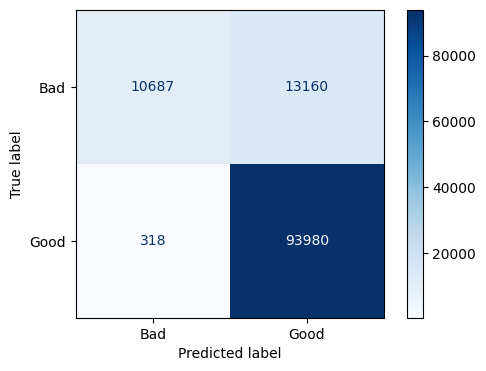

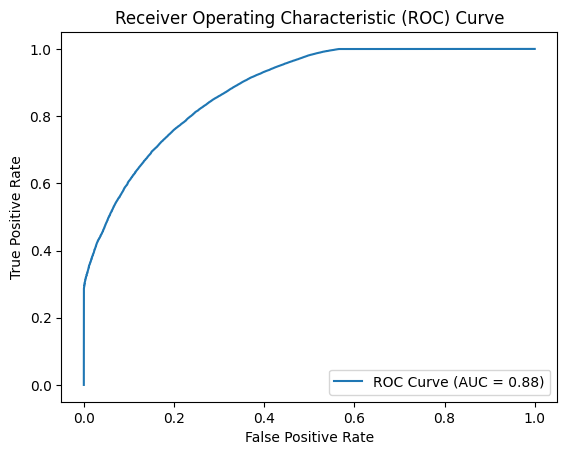

In [103]:
fig, ax = plt.subplots(figsize=(6, 4)) 
disp = ConfusionMatrixDisplay.from_estimator(
    lr, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Bad', 'Good'],
    ax=ax  
)
plt.show()

y_test_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc=roc_auc_score(y_test,y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [104]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr.predict(X_train)),
        'Test': roc_auc_score(y_test, lr.predict(X_test)),
    },
}

### Scorecard Creation

In [105]:
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,
    class_weight = 'balanced',
    C=0.1,
    base_score = 800,
    base_odds = 35 ,
    pdo = 20,
    rate = 2
)

card.fit(X_train, y_train)
final_card = card.export(to_frame=True)  
final_card

,name,value,score
0,term,[-inf ~ 60),6.57
1,term,[60 ~ inf),22.83
2,installment,[-inf ~ 67.57),0.33
3,installment,[67.57 ~ 160.75),6.55
4,installment,[160.75 ~ 182.62),10.15
...,...,...,...
215,zip_code_70466,[1 ~ inf),11.22
216,zip_code_86630,[-inf ~ 1),7.02
217,zip_code_86630,[1 ~ inf),292.90
218,zip_code_93700,[-inf ~ 1),6.89


In [106]:
final_card.to_csv('scorecard.csv')

In [107]:
test.loc[:, 'CreditScore'] = card.predict(X_test)

In [108]:
test.sample(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,CreditScore
201639,16675.0,60 months,17.57,419.55,D,D4,RENT,38000.0,Source Verified,0,debt_consolidation,15.67,2003,7.0,0,2546.0,16.9,18.0,w,INDIVIDUAL,1.0,0.0,86630,657.651372
90503,12000.0,36 months,8.18,377.04,B,B1,MORTGAGE,38376.0,Source Verified,0,credit_card,8.69,2000,13.0,0,12781.0,34.8,25.0,w,INDIVIDUAL,1.0,0.0,22690,657.651372
133446,7000.0,36 months,14.48,240.88,C,C5,RENT,30000.0,Verified,1,home_improvement,26.48,2002,11.0,1,6688.0,58.2,22.0,f,INDIVIDUAL,0.0,1.0,48052,657.651372
109543,13800.0,60 months,16.55,339.64,D,D2,MORTGAGE,36000.0,Not Verified,1,debt_consolidation,34.50,1984,9.0,0,17951.0,93.0,18.0,w,INDIVIDUAL,1.0,0.0,48052,657.651372
393678,7350.0,36 months,15.61,257.00,D,D1,RENT,83000.0,Source Verified,1,debt_consolidation,20.43,1998,16.0,0,2339.0,36.0,33.0,f,INDIVIDUAL,0.0,0.0,70466,657.651372
315397,3000.0,36 months,8.59,94.83,A,A5,RENT,45000.0,Source Verified,1,credit_card,28.55,1994,10.0,0,3169.0,9.9,16.0,w,INDIVIDUAL,0.0,0.0,22690,638.237696
349239,6000.0,36 months,13.68,204.14,C,C1,RENT,49000.0,Not Verified,1,credit_card,17.60,2009,7.0,0,5597.0,33.3,7.0,f,INDIVIDUAL,0.0,0.0,48052,657.651372
122657,4200.0,36 months,12.99,141.50,C,C2,MORTGAGE,50000.0,Not Verified,1,vacation,8.69,1998,14.0,0,9037.0,31.0,29.0,f,INDIVIDUAL,0.0,0.0,48052,657.651372
5426,28000.0,60 months,25.57,831.23,F,F5,MORTGAGE,190000.0,Source Verified,0,debt_consolidation,9.10,1999,7.0,0,13979.0,49.9,12.0,w,INDIVIDUAL,1.0,0.0,30723,657.651372
368574,12000.0,36 months,9.99,387.15,B,B3,RENT,70000.0,Not Verified,1,debt_consolidation,8.64,2011,9.0,0,7688.0,43.2,9.0,f,INDIVIDUAL,0.0,0.0,29597,389.916523


## XGBoost Classifier

In [109]:
xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:19:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Result:
Accuracy Score: 89.13%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.940136       0.885503  0.891269       0.912820       0.896519
recall         0.492083       0.992086  0.891269       0.742085       0.891269
f1-score       0.646026       0.935770  0.891269       0.790898       0.877348
support    47872.000000  189549.000000  0.891269  237421.000000  237421.000000
_______________________________________________
Confusion Matrix: 
 [[ 23557  24315]
 [  1500 188049]]

Test Result:
Accuracy Score: 88.59%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.913800      0.882612   0.88592       0.898206       0.888908
recall         0.480102      0.988547   0.88592       0.734325       0.885920
f1-score       0.629481      0.932581   0.88592     

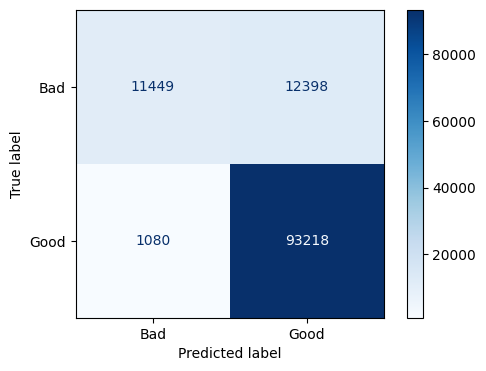

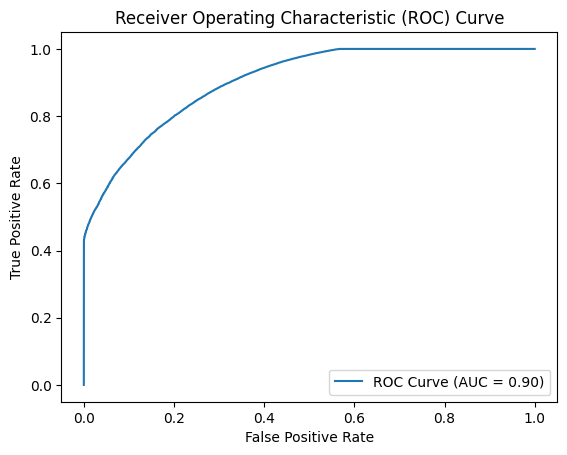

In [110]:
fig, ax = plt.subplots(figsize=(6, 4))  
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Bad', 'Good'],
    ax=ax  
)
plt.show()

y_test_prob=xgb_clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc=roc_auc_score(y_test,y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [111]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

## Random Forest Classifier

In [112]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      1.000000       0.999984  0.999987       0.999992       0.999987
recall         0.999937       1.000000  0.999987       0.999969       0.999987
f1-score       0.999969       0.999992  0.999987       0.999980       0.999987
support    47872.000000  189549.000000  0.999987  237421.000000  237421.000000
_______________________________________________
Confusion Matrix: 
 [[ 47869      3]
 [     0 189549]]

Test Result:
Accuracy Score: 88.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.955642      0.878361  0.885793       0.917001       0.893960
recall         0.455319      0.994655  0.885793       0.724987       0.885793
f1-score       0.616774      0.932898  0.885793    

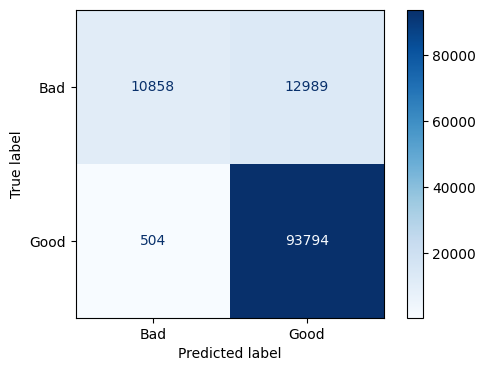

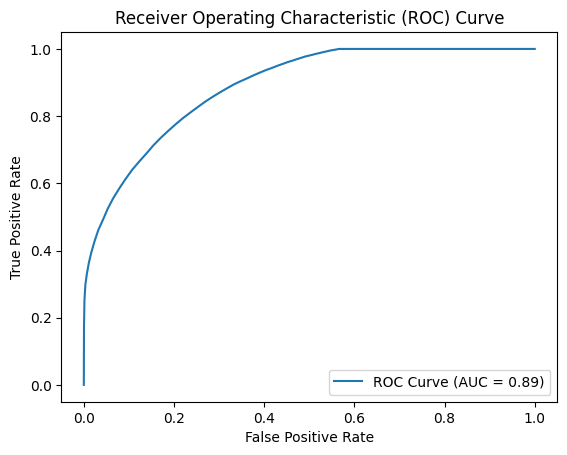

In [113]:
fig, ax = plt.subplots(figsize=(6, 4)) 
disp = ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Bad', 'Good'],
    ax=ax 
)
plt.show()

y_test_prob=rf_clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc=roc_auc_score(y_test,y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [114]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

# 📊 Comparing Models Prerformance

In [115]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.725
XGBOOST                        roc_auc_score: 0.734
LOGISTIC REGRESSION            roc_auc_score: 0.722


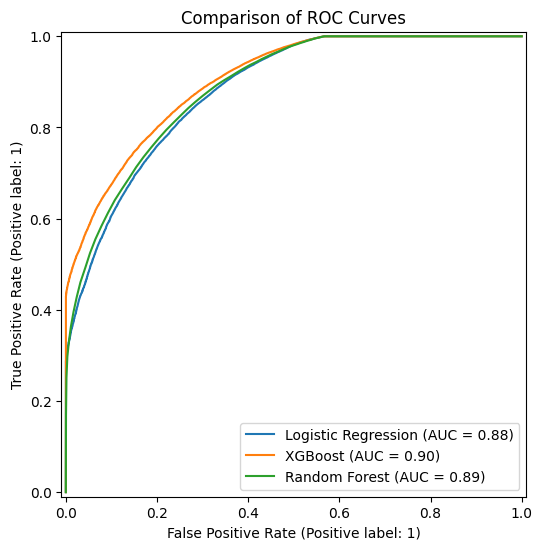

In [124]:
fig, ax = plt.subplots(figsize=(6, 8))

disp = RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=ax, name="XGBoost")
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=ax, name="Random Forest")

ax.set_title("Comparison of ROC Curves")
plt.show()

In [117]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)